In [3]:
from pathlib import Path
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import MMCIFParser, PDBParser
from matplotlib.colors import LinearSegmentedColormap
import networkx as nx
from tqdm.notebook import tqdm

In [4]:
scoresAF2 = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/MOR1 TOG1 Alphafold2/mor1tog1WTrank3best.json").read_text())
scoresAF3l6rem = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/MOR1 TOG1 last 6 and first 1 rem/fold_mor1_tog1_last_6_rem_and_first_1_full_data_0.json").read_text())
scoresmor11 = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/mor1-1 TOG1 last 6 and first 1 rem/fold_mor1_1_tog1_last_6_rem_and_first_1_full_data_0.json").read_text())
scoresMOR1tubulin = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_full_data_0.json").read_text())
scoresmor11tubulin = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 mor1-1/fold_tua4_tub4_mor1_1_full_data_0.json").read_text())
#scoresmor12 = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 mor1-2/fold_tua4_tub4_mor1_2_full_data_0.json").read_text())

Average PLDDTs: 90.66114763231198
Average pae: 4.328399542005473


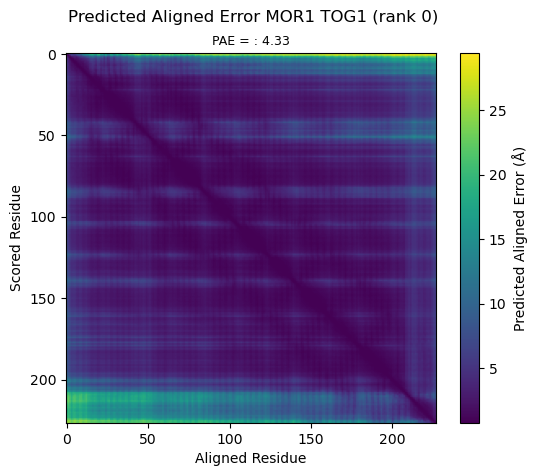

1883.7


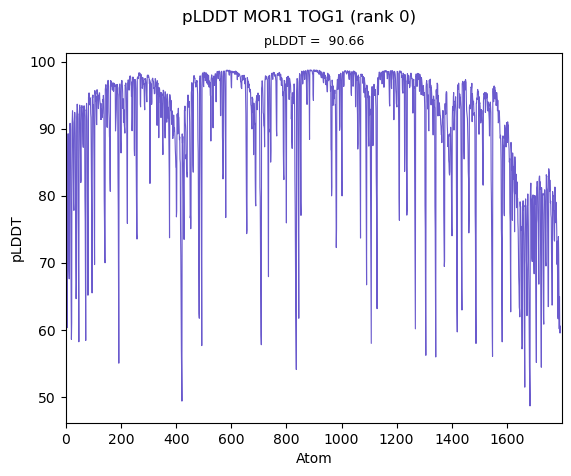

In [5]:
#rank 0 for MOR1 TOG1 6 aa rem at end
avgplddts1 = np.mean(scoresAF3l6rem["atom_plddts"])  
avgpae1 = np.mean(scoresAF3l6rem["pae"])  
print("Average PLDDTs:", avgplddts1)
print("Average pae:", avgpae1)

plt.imshow(np.asarray(scoresAF3l6rem["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE = : {avgpae1:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error MOR1 TOG1 (rank 0)", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path1 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1TOG1_PAE_graph.png" 
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()

plt.plot(np.asarray(scoresAF3l6rem["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts1:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT MOR1 TOG1 (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd1 = right_limit
print(rightEnd1)
plt.xlim(left=0, right=rightEnd1-84)

desktop_path2 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()



Average PLDDTs: 90.5197107897664
Average pae: 4.371874090318074


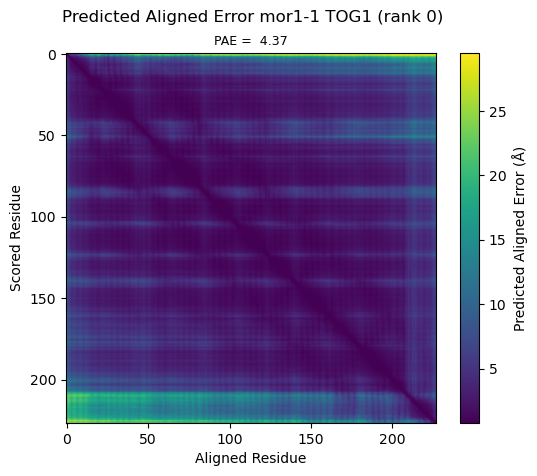

1886.85


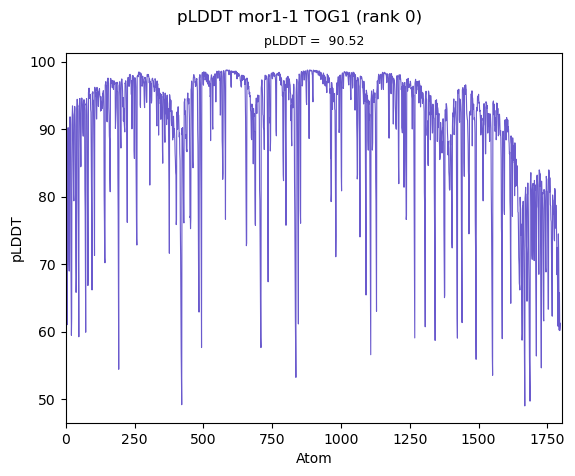

In [6]:
#rank 0 for mor1-1 TOG1 6 aa rem at end

avgplddts2 = np.mean(scoresmor11["atom_plddts"])  
avgpae2 = np.mean(scoresmor11["pae"])  
print("Average PLDDTs:", avgplddts2)
print("Average pae:", avgpae2)

plt.imshow(np.asarray(scoresmor11["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE =  {avgpae2:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error mor1-1 TOG1 (rank 0)", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path3 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1_1_TOG1_PAE.png" 
plt.savefig(desktop_path3, format='png', dpi=300) 
plt.show()


plt.plot(np.asarray(scoresmor11["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts2:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT mor1-1 TOG1 (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit
print(rightEnd2)
plt.xlim(left=0, right=rightEnd2-84)

desktop_path4 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1_1_TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path4, format='png', dpi=300) 
plt.show()



In [53]:

def find_atoms_in_residue(file_path, file_format, chain_id, residue_number):
    """
    Finds the atom indices corresponding to a given amino acid residue.
    
    Parameters:
    - file_path (str): Path to the protein structure file (.cif, .pdb, or .json).
    - file_format (str): File format ('cif', 'pdb', or 'json').
    - chain_id (str): Chain identifier (e.g., 'A').
    - residue_number (int): Residue number in the chain.
    
    Returns:
    - atom_indices (list): List of atom indices corresponding to the residue.
    """
    # Parse the structure
    if file_format == "cif":
        parser = MMCIFParser(QUIET=True)
    elif file_format == "pdb":
        parser = PDBParser(QUIET=True)
    else:
        raise ValueError("Unsupported file format. Use 'cif' or 'pdb'.")
    
    structure = parser.get_structure("protein", file_path)
    
    # Find atoms in the specified residue
    atom_indices = []
    for model in structure:
        chain = model[chain_id]
        for residue in chain:
            if residue.id[1] == residue_number:  # Match the residue number
                for atom in residue:
                    atom_indices.append(atom.serial_number)  # Get the atom's index
    
    return atom_indices


# Example usage
#file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/MOR1 TOG1 last 6 and first 1 rem/fold_mor1_tog1_last_6_rem_and_first_1_model_0.cif"  # Update this with your file path
file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/mor1-2 mutant/fold_tog1_mor1_2_mutant_model_0.cif"
file_format = "cif"  # Change to "pdb" if using a PDB file
chain_id = "A"  # Replace with your chain identifier
residue_number =96
# Replace with your residue number

atom_indices = find_atoms_in_residue(file_path, file_format, chain_id, residue_number)
print(f"Atom indices for residue {residue_number} in chain {chain_id}: {atom_indices}")




Atom indices for residue 96 in chain A: [761, 762, 763, 764, 765, 766]


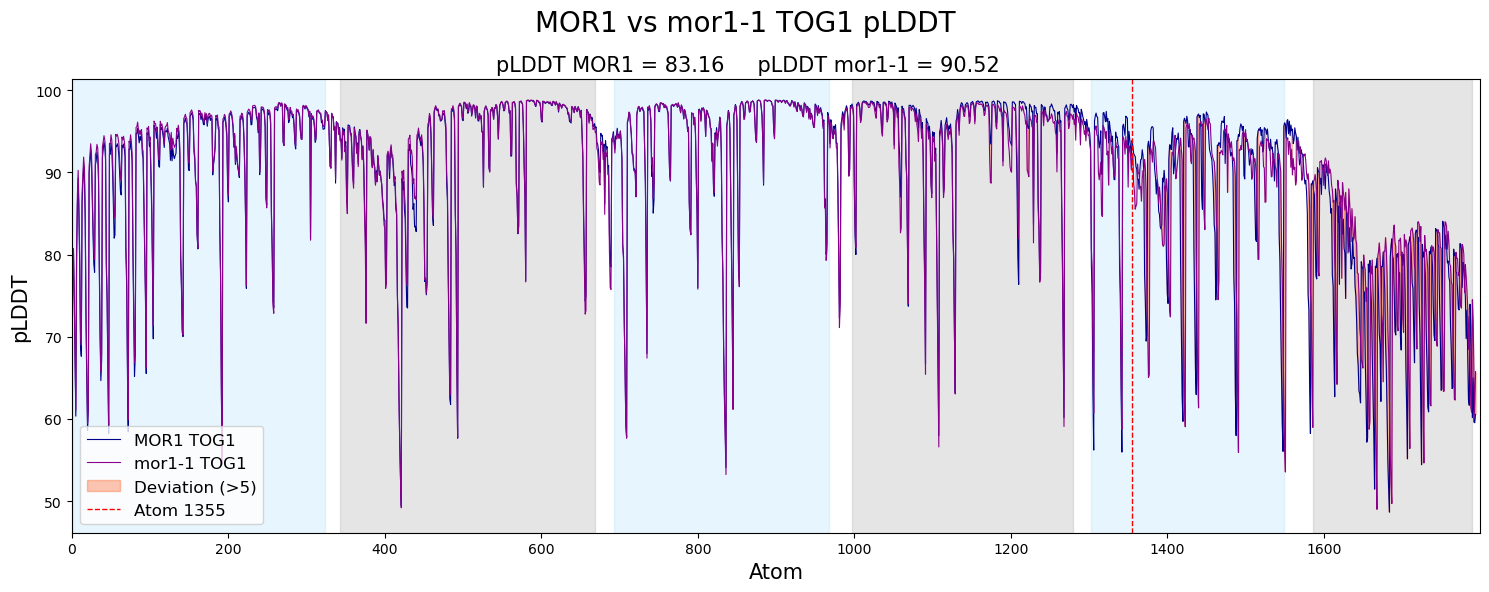

In [51]:


# Example data
data1 = np.asarray(scoresAF3l6rem["atom_plddts"])
data2 = np.asarray(scoresmor11["atom_plddts"])

# Trim data to the same length
min_length = min(len(data1), len(data2))
data1 = data1[:min_length]
data2 = data2[:min_length]

plt.figure(figsize=(15, 6))  # Width: 15 inches, Height: 6 inches
# Plot the two datasets
plt.plot(data1, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data2, linewidth=0.8, color="darkmagenta", label="mor1-1 TOG1")

# Highlight deviations
deviation = np.abs(data1 - data2)  # Compute absolute difference
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > 5),  # Highlight deviations greater than a threshold (e.g., 5)
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')
left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit
plt.xlim(left=0, right=rightEnd2-84)

highlight_atom = 1355  # Replace with the index of the atom you want to highlight
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label=f"Atom {highlight_atom}")

plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.suptitle(f"MOR1 vs mor1-1 TOG1 pLDDT", fontsize=20)
plt.title(f"pLDDT MOR1 = {avgplddts1:.2f}     pLDDT mor1-1 = {avgplddts2:.2f}", x=0.48, y=1, fontsize=15)
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1vsmor11TOG1pLDDT.png" , dpi=300)
plt.show()


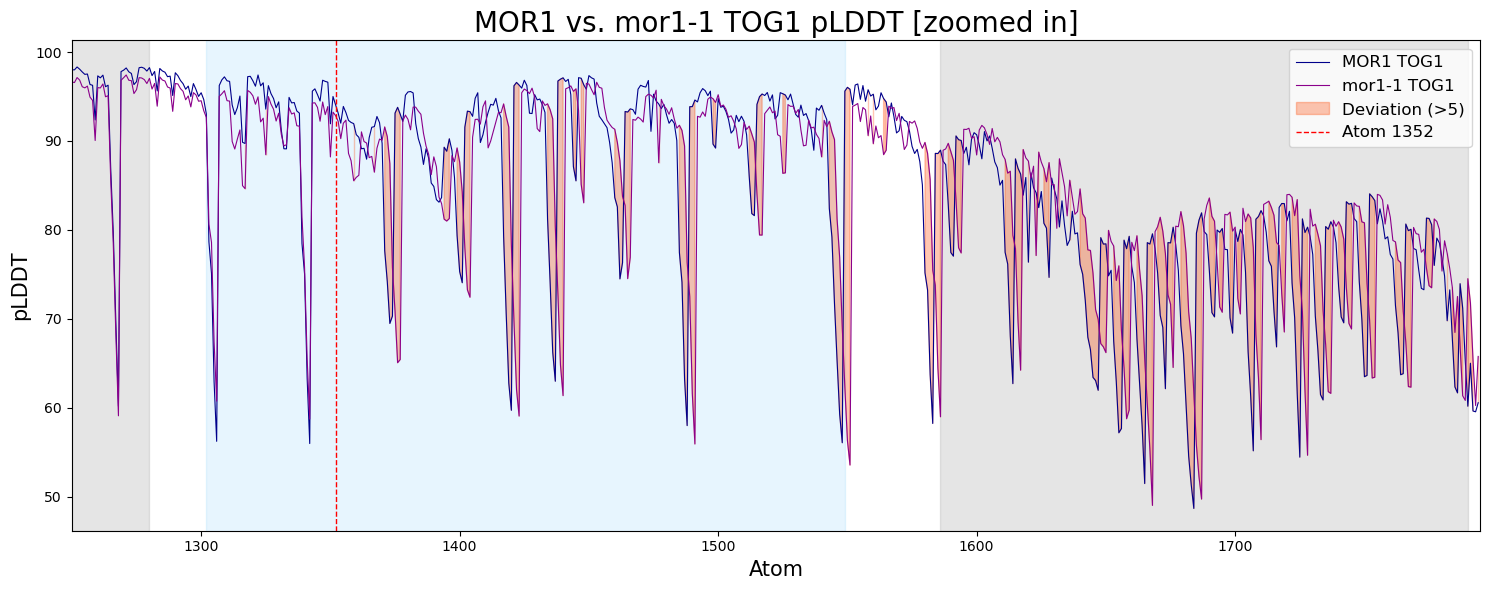

In [52]:

# Example data
data1 = np.asarray(scoresAF3l6rem["atom_plddts"])
data2 = np.asarray(scoresmor11["atom_plddts"])

# Trim data to the same length
min_length = min(len(data1), len(data2))
data1 = data1[:min_length]
data2 = data2[:min_length]

plt.figure(figsize=(15, 6))  # Width: 15 inches, Height: 6 inches
# Plot the two datasets
plt.plot(data1, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data2, linewidth=0.8, color="darkmagenta", label="mor1-1 TOG1")

# Highlight deviations
deviation = np.abs(data1 - data2) 
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > 5),  
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')
left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit

plt.xlim(left=1250, right=rightEnd2-89)
highlight_atom = 1352  # Replace with the index of the atom you want to highlight
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label=f"Atom {highlight_atom}")


# Add labels, titles, and legend
plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.title(f"MOR1 vs. mor1-1 TOG1 pLDDT [zoomed in]", fontsize=20)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1vsmor11TOG1pLDDTzoomedin.png", dpi=300)
plt.show()


In [10]:

def calculate_chain_lengths(token_res_ids):
    chain_lengths = []
    current_chain_length = 1  # Initialize with 1 to account for the first residue
    previous_residue = token_res_ids[0]

    for residue in token_res_ids[1:]:
        if residue == previous_residue + 1:
            current_chain_length += 1
        else:
            chain_lengths.append(current_chain_length)
            current_chain_length = 1
        previous_residue = residue

    # Add length of the last chain
    chain_lengths.append(current_chain_length)

    return chain_lengths


Number of residues: 227
Entity Lengths: [227]


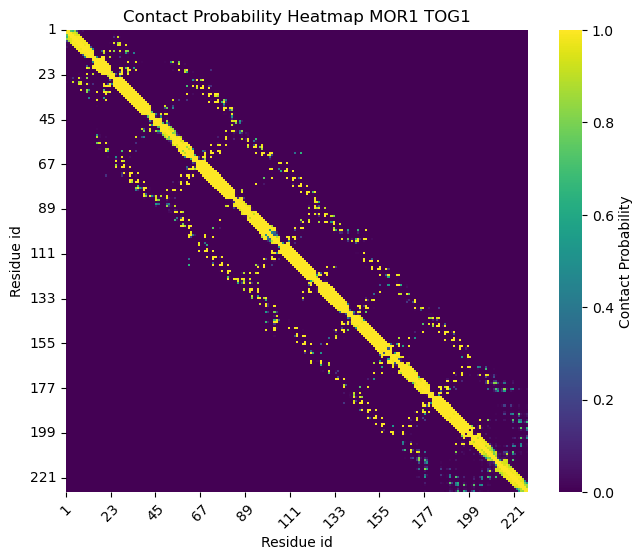

In [11]:
#MOR1 heatmap contact

contact_data = scoresAF3l6rem['contact_probs']
token_res_ids = scoresAF3l6rem['token_res_ids']


print('Number of residues: {}'.format(len(token_res_ids)))

# Calculate chain lengths
chain_lengths = calculate_chain_lengths(token_res_ids)
print('Entity Lengths:', chain_lengths)


# Calculate total number of residues
total_residues = sum(chain_lengths)

# Create heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap for the entire data
contact_probs_heatmap = sns.heatmap(contact_data, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)

# Customize plot
plt.title('Contact Probability Heatmap MOR1 TOG1')
plt.xlabel('Residue id')
plt.ylabel('Residue id')

# Set tick positions to cover the full range of data
tick_positions = np.arange(total_residues)
tick_labels = [str(i+1) for i in range(total_residues)]  # Adjust for 1-based indexing

# Adjust tick frequency
num_ticks = 10  # Change this value to adjust the number of ticks
tick_step = total_residues // num_ticks
if tick_step == 0:  # Ensure at least one tick per interval
    tick_step = 1
plt.xticks(tick_positions[::tick_step], tick_labels[::tick_step], rotation=45)
plt.yticks(tick_positions[::tick_step], tick_labels[::tick_step])


# Show color legend
cbar = contact_probs_heatmap.collections[0].colorbar
cbar.set_label('Contact Probability')

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1ContactProbabilityHeatmap.png", dpi=300)
plt.show()

contact_probs_heatmap_image = contact_probs_heatmap.get_figure()

# Store which folder was used when creating the figure
#contact_probs_heatmap_folder = selected_folder_path

Number of residues: 227
Entity Lengths: [227]


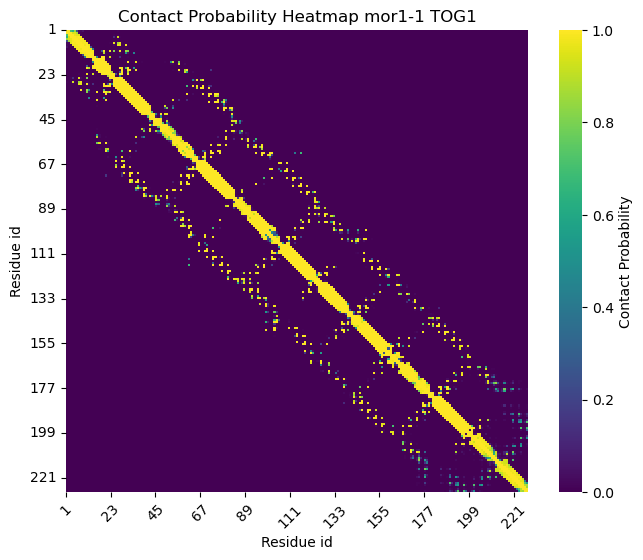

In [12]:
#mor1-1 contact heatmap

contact_data = scoresmor11['contact_probs']
token_res_ids = scoresmor11['token_res_ids']


print('Number of residues: {}'.format(len(token_res_ids)))

# Calculate chain lengths
chain_lengths = calculate_chain_lengths(token_res_ids)
print('Entity Lengths:', chain_lengths)


# Calculate total number of residues
total_residues = sum(chain_lengths)

# Create heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap for the entire data
contact_probs_heatmap = sns.heatmap(contact_data, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)

# Customize plot
plt.title('Contact Probability Heatmap mor1-1 TOG1')
plt.xlabel('Residue id')
plt.ylabel('Residue id')

# Set tick positions to cover the full range of data
tick_positions = np.arange(total_residues)
tick_labels = [str(i+1) for i in range(total_residues)]  # Adjust for 1-based indexing

# Adjust tick frequency
num_ticks = 10  # Change this value to adjust the number of ticks
tick_step = total_residues // num_ticks
if tick_step == 0:  # Ensure at least one tick per interval
    tick_step = 1
plt.xticks(tick_positions[::tick_step], tick_labels[::tick_step], rotation=45)
plt.yticks(tick_positions[::tick_step], tick_labels[::tick_step])


# Show color legend
cbar = contact_probs_heatmap.collections[0].colorbar
cbar.set_label('Contact Probability')

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor11ContactProbabilityHeatmap.png", dpi=300)
plt.show()

contact_probs_heatmap_image = contact_probs_heatmap.get_figure()


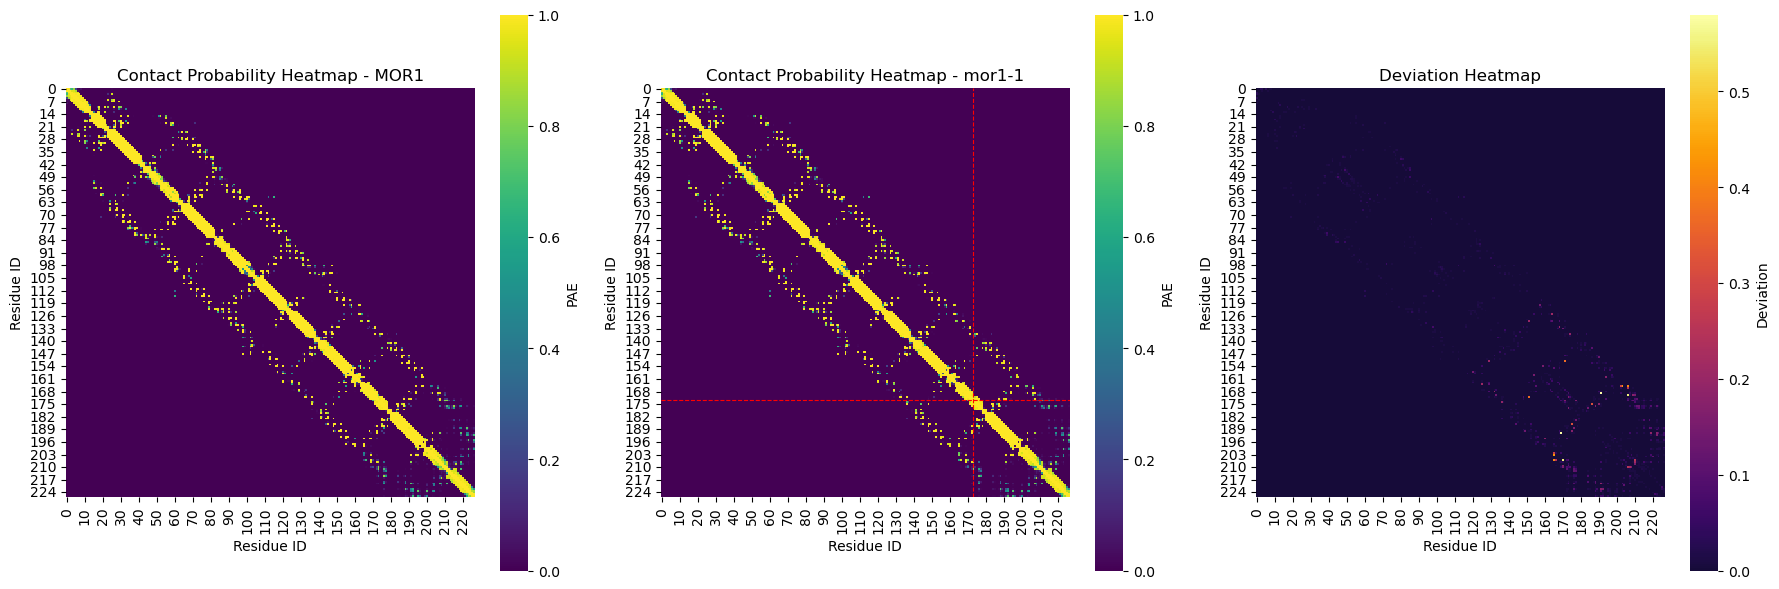

In [13]:

highlight_residue = 173

# Data for Protein 1
contact_data1 = np.array(scoresAF3l6rem['contact_probs'])  # Convert to NumPy array
token_res_ids1 = scoresAF3l6rem['token_res_ids']

# Data for Protein 2
contact_data2 = np.array(scoresmor11['contact_probs'])  # Convert to NumPy array
token_res_ids2 = scoresmor11['token_res_ids']

# Ensure the contact matrices are the same shape by trimming or padding
min_shape = min(contact_data1.shape[0], contact_data2.shape[0])
contact_data1 = contact_data1[:min_shape, :min_shape]
contact_data2 = contact_data2[:min_shape, :min_shape]

# Calculate deviations
deviation_data = np.abs(contact_data1 - contact_data2)

# Plot the heatmaps
plt.figure(figsize=(18, 6))


from matplotlib.colors import LinearSegmentedColormap

# Function to crop a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Original colormap
original_cmap = plt.cm.inferno

# Crop the colormap to use only the middle 50% of the range
cropped_cmap = truncate_colormap(original_cmap, minval=0.1, maxval=1)


plt.subplot(1, 3, 1)
sns.heatmap(contact_data1, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)
plt.title('Contact Probability Heatmap - MOR1')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')

plt.subplot(1, 3, 2)
sns.heatmap(contact_data2, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)
plt.title('Contact Probability Heatmap - mor1-1')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')
plt.axvline(x=highlight_residue, color='red', linestyle='--', linewidth=0.8)  # Vertical line
plt.axhline(y=highlight_residue, color='red', linestyle='--', linewidth=0.8) 

plt.subplot(1, 3, 3)
sns.heatmap(deviation_data, cmap=cropped_cmap, cbar_kws={'label': 'Deviation'}, square=True)
plt.title('Deviation Heatmap')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')

plt.tight_layout()
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/DeviationHeatmap.png", dpi=300)
plt.show()

Average PLDDTs: 85.007592176259
Average pae: 11.087613471048087


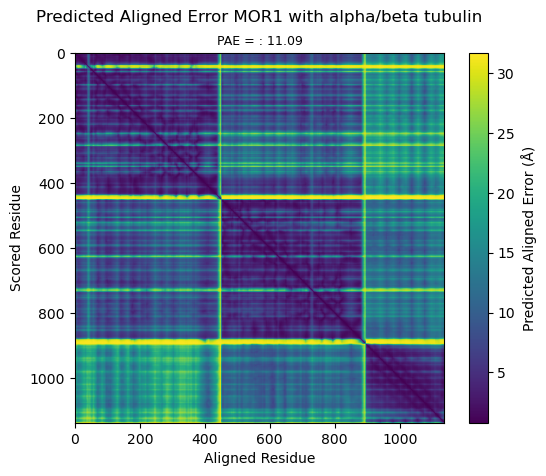

9339.75


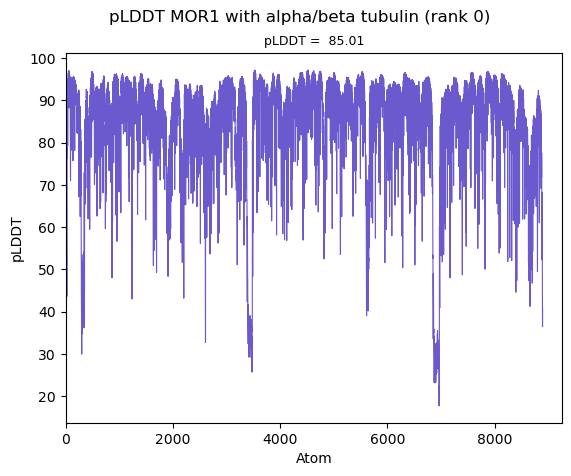

In [14]:
#rank 0 for MOR1 and tubulin 
avgplddts1 = np.mean(scoresMOR1tubulin["atom_plddts"])  
avgpae1 = np.mean(scoresMOR1tubulin["pae"])  
print("Average PLDDTs:", avgplddts1)
print("Average pae:", avgpae1)


plt.imshow(np.asarray(scoresMOR1tubulin["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE = : {avgpae1:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error MOR1 with alpha/beta tubulin ", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path1 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1TOG1_PAE_graph.png" 
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()


plt.plot(np.asarray(scoresMOR1tubulin["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts1:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT MOR1 with alpha/beta tubulin (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd1 = right_limit
print(rightEnd1)
plt.xlim(left=0, right=rightEnd1-84)

desktop_path2 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()


Average PLDDTs: 83.15527025508484
Average pae: 11.484777428411697


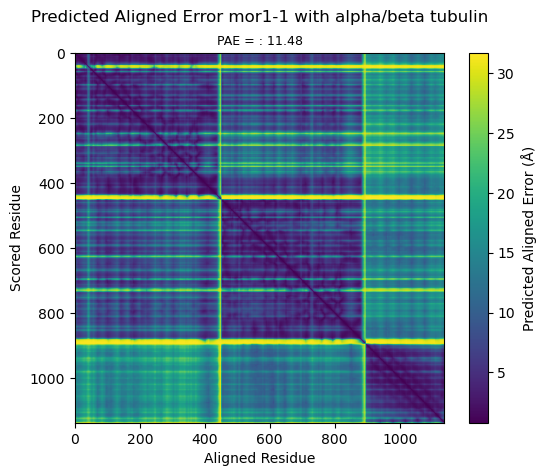

9342.9


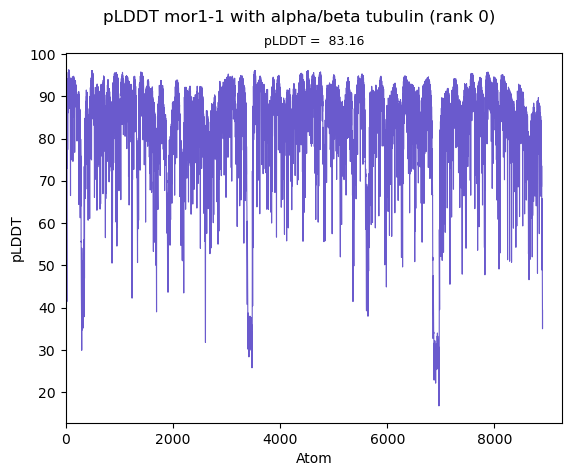

In [15]:
#rank 0 for MOR1 and tubulin 
avgplddts1 = np.mean(scoresmor11tubulin["atom_plddts"])  
avgpae1 = np.mean(scoresmor11tubulin["pae"])  
print("Average PLDDTs:", avgplddts1)
print("Average pae:", avgpae1)


plt.imshow(np.asarray(scoresmor11tubulin["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE = : {avgpae1:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error mor1-1 with alpha/beta tubulin ", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path1 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-1 TOG1_PAE_graph.png" 
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()
plt.plot(np.asarray(scoresmor11tubulin["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts1:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT mor1-1 with alpha/beta tubulin (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd1 = right_limit
print(rightEnd1)
plt.xlim(left=0, right=rightEnd1-84)

desktop_path2 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-1TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()


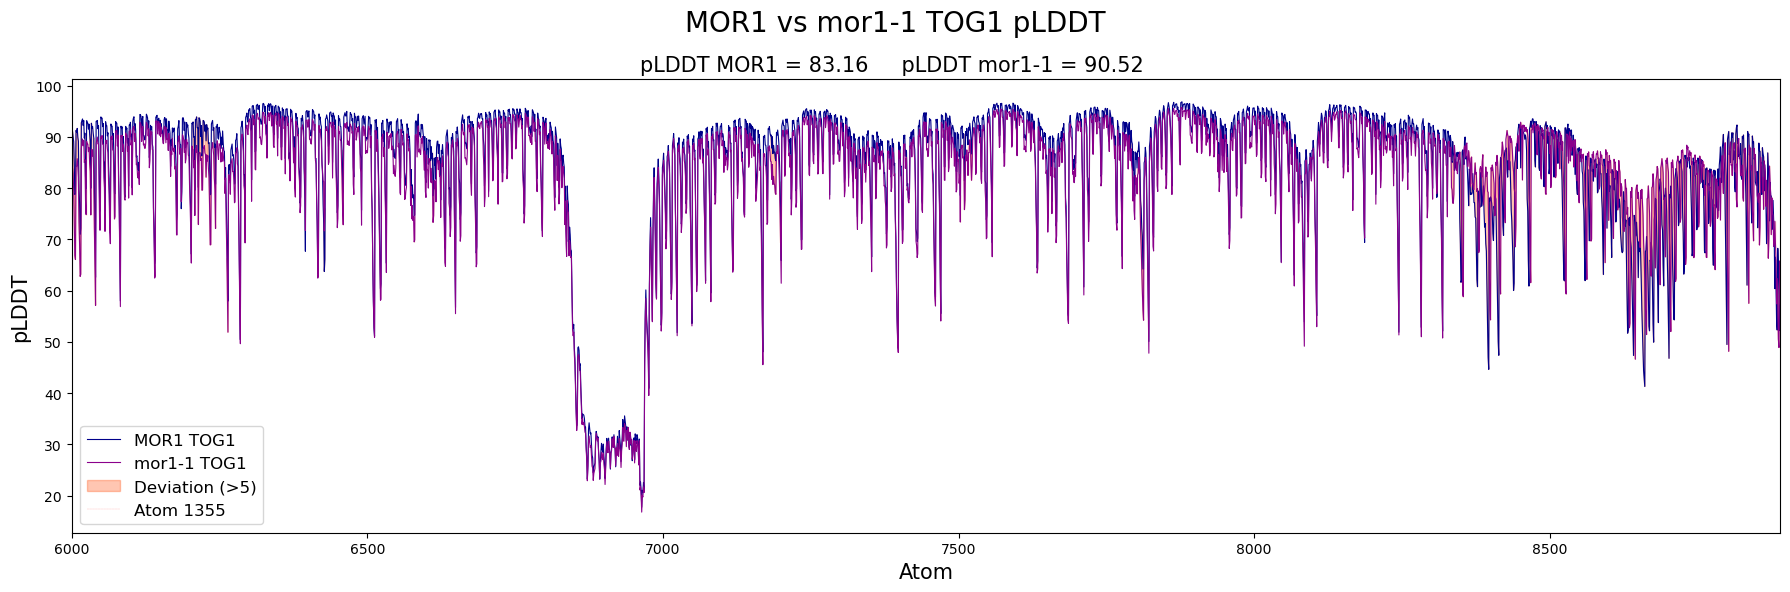

In [16]:


# Example data
data1 = np.asarray(scoresMOR1tubulin["atom_plddts"])
data2 = np.asarray(scoresmor11tubulin["atom_plddts"])

# Trim data to the same length
min_length = min(len(data1), len(data2))
data1 = data1[:min_length]
data2 = data2[:min_length]

plt.figure(figsize=(18, 6))  # Width: 15 inches, Height: 6 inches
# Plot the two datasets
plt.plot(data1, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data2, linewidth=0.8, color="darkmagenta", label="mor1-1 TOG1")

# Highlight deviations
deviation = np.abs(data1 - data2)  # Compute absolute difference
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > 5),  # Highlight deviations greater than a threshold (e.g., 5)
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)

left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit
plt.xlim(left=6000, right=rightEnd2-450)

highlight_atom = 1355  # Replace with the index of the atom you want to highlight
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=0.1, label=f"Atom {highlight_atom}")

plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.suptitle(f"MOR1 vs mor1-1 TOG1 pLDDT", fontsize=20)
plt.title(f"pLDDT MOR1 = {avgplddts1:.2f}     pLDDT mor1-1 = {avgplddts2:.2f}", x=0.48, y=1, fontsize=15)
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1vsmor11TOG1pLDDT.png" , dpi=300)
plt.show()


The shifted residue number is: 830


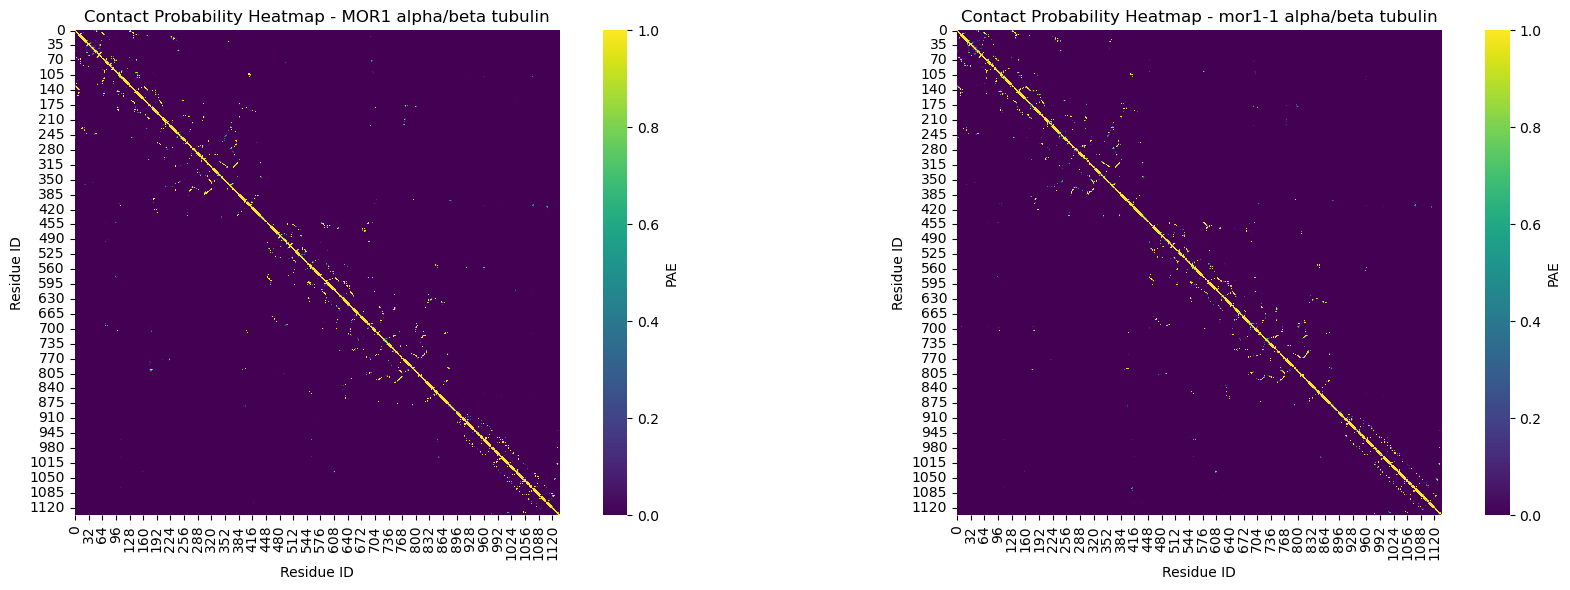

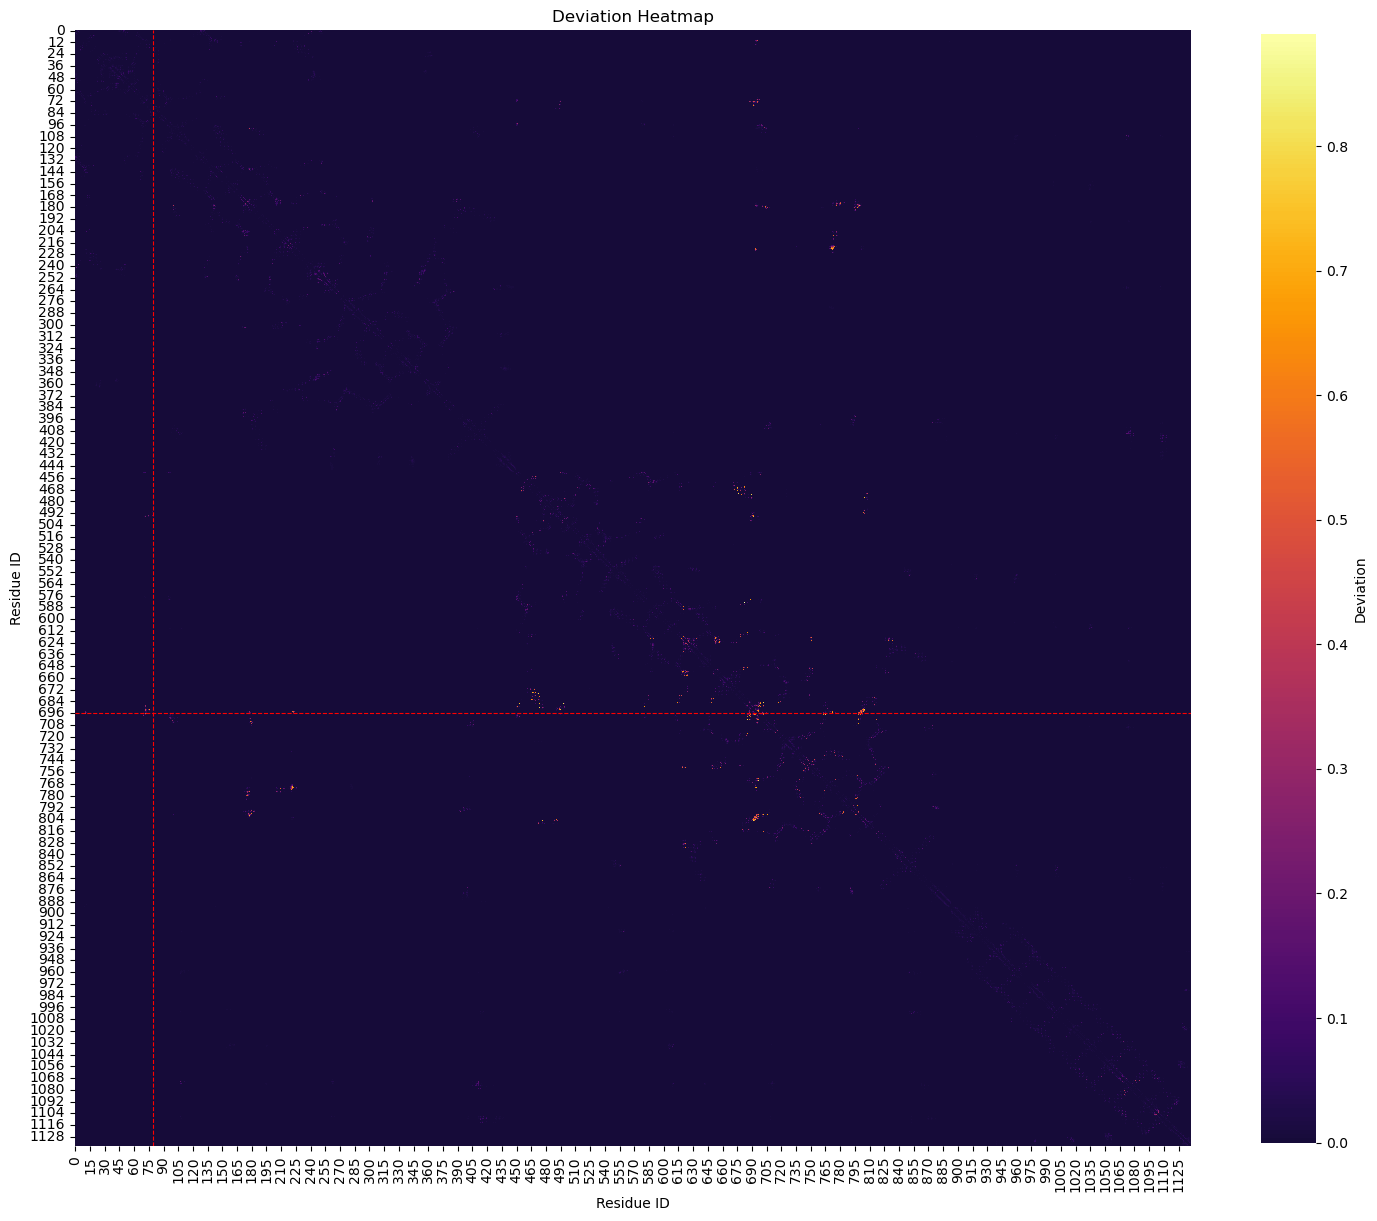

In [17]:
# Chain lengths
chainA = 450
chainB = 449
chainC = 244

# Function to calculate the shifted residue number
def calculate_shifted_residue(selected_protein, raw_residue_number):
    """
    Calculates the shifted residue number for highlighting a specific residue
    based on the selected protein chain.

    Parameters:
        selected_protein (int): Total number of residues in the selected chain (e.g., chainA, chainB, chainC).
        raw_residue_number (int): The residue number within the selected chain.

    Returns:
        int: The shifted residue number for the combined graph.
    """
    if selected_protein == chainA:
        # Chain A is the first chain, so no offset is needed
        new_res_number = raw_residue_number
    elif selected_protein == chainB:
        # Chain B starts after Chain A, so we add the length of Chain A
        new_res_number = chainA + raw_residue_number
    elif selected_protein == chainC:
        # Chain C starts after Chains A and B, so we add their lengths
        new_res_number = chainA + chainB + raw_residue_number
    else:
        raise ValueError("Invalid selected_protein. Must be chainA, chainB, or chainC.")

    return new_res_number



contact_data1 = np.array(scoresMOR1tubulin['contact_probs'])  
token_res_ids1 = scoresMOR1tubulin['token_res_ids']

contact_data2 = np.array(scoresmor11tubulin['contact_probs'])  
token_res_ids2 = scoresmor11tubulin['token_res_ids']

min_shape = min(contact_data1.shape[0], contact_data2.shape[0])
contact_data1 = contact_data1[:min_shape, :min_shape]
contact_data2 = contact_data2[:min_shape, :min_shape]
deviation_data = np.abs(contact_data1 - contact_data2)
plt.figure(figsize=(18, 6))

def truncate_colormap(cmap, minval=0.0, maxval=1, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

original_cmap = plt.cm.inferno
cropped_cmap = truncate_colormap(original_cmap, minval=0.1, maxval=1)



# Example usage:
selected_protein = chainB  # Choose the chain (e.g., chainA, chainB, chainC)
raw_residue_number = 380  # The residue number to highlight within the selected chain

shifted_residue = calculate_shifted_residue(selected_protein, raw_residue_number)
print(f"The shifted residue number is: {shifted_residue}")




plt.subplot(1, 2, 1)
sns.heatmap(contact_data1, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)
plt.title('Contact Probability Heatmap - MOR1 alpha/beta tubulin')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')

plt.subplot(1, 2, 2)
sns.heatmap(contact_data2, cmap='viridis', cbar_kws={'label': 'PAE'}, square=True)
plt.title('Contact Probability Heatmap - mor1-1 alpha/beta tubulin')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')

plt.tight_layout()
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1mor11withTubulinContactProbabilityMap.png", dpi=300)
plt.show()

plt.figure(figsize=(18, 18))
sns.heatmap(deviation_data, cmap=cropped_cmap, cbar_kws={'label': 'Deviation', 'shrink': 0.8}, square=True)
plt.title('Deviation Heatmap')
plt.xlabel('Residue ID')
plt.ylabel('Residue ID')

plt.axvline(x=80, color='red', linestyle='--', linewidth=0.8)  # Vertical line
plt.axhline(y=696, color='red', linestyle='--', linewidth=0.8) 
      # x=shifted_residue     
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1mor11withTubulinDEVIATIONContactProbabilityMap.png", dpi=300)
plt.show()



In [18]:


def extract_3d_coordinates(cif_file):
    """
    Extracts 3D coordinates (x, y, z) of atoms and their associated chain and residue IDs from a .cif file.
    
    Parameters:
    - cif_file (str): Path to the .cif file.
    
    Returns:
    - atom_data (list): List of dictionaries containing atom coordinates and identifiers.
    """
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("protein", cif_file)
    
    atom_data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    atom_data.append({
                        "chain_id": chain.id,
                        "residue_id": residue.id[1],
                        "atom_name": atom.name,
                        "position": atom.coord
                    })
    return atom_data

def find_interacting_residues(atom_data, cutoff=4.0, include_chains=None):
    """
    Identifies interacting residues between specified chains based on a distance cutoff.
    Ensures the closest interaction is selected per residue pair and eliminates duplicates.
    
    Parameters:
    - atom_data (list): List of dictionaries containing atom coordinates and identifiers.
    - cutoff (float): Distance cutoff for interaction in Ångstroms.
    - include_chains (list of tuples): List of chain pairs to include in the analysis (e.g., [('A', 'B'), ('A', 'C')]).
      If None, interactions between all chains are included.
    
    Returns:
    - interactions (list): List of tuples representing interactions and distances ((chain1, res1), (chain2, res2), distance).
    """
    interactions = []
    closest_distances = {}  # Track closest distances for each residue pair
    total_atoms = len(atom_data)

    strong_h_bonds = 0
    weak_h_bonds = 0

    for i, atom1 in enumerate(tqdm(atom_data, desc="Parsing residues")):
        for j, atom2 in enumerate(atom_data):
            if atom1["chain_id"] == atom2["chain_id"]:
                continue
            
            chain_pair = (atom1["chain_id"], atom2["chain_id"])
            if include_chains and chain_pair not in include_chains and chain_pair[::-1] not in include_chains:
                continue
            
            residue_pair = tuple(sorted([(atom1["chain_id"], atom1["residue_id"]), (atom2["chain_id"], atom2["residue_id"])]))
            dist = np.linalg.norm(atom1["position"] - atom2["position"])

            if dist > cutoff:
                continue

            # Update the closest distance for this residue pair
            if residue_pair not in closest_distances or dist < closest_distances[residue_pair]:
                closest_distances[residue_pair] = dist

    # Process the closest distances
    for residue_pair, dist in closest_distances.items():
        interactions.append((residue_pair[0], residue_pair[1], dist))
        if dist <= 3.0:
            strong_h_bonds += 1
        else:
            weak_h_bonds += 1
        print(f"Found interaction: {residue_pair[0]} <-> {residue_pair[1]} at distance {dist:.2f} Å")

    print("Find residues complete")
    print(f"Strong H bonds (<= 3.0 Å): {strong_h_bonds}")
    print(f"Weak H bonds (> 3.0 Å): {weak_h_bonds}")
    return interactions

def visualize_interactions(interactions, save_path=None):
    """
    Visualizes interactions between residues using a network graph, coloring nodes by chain and labeling edges with distances.
    Adjusts edge spacing based on the number of connections.
    
    Parameters:
    - interactions (list): List of tuples representing interactions ((chain1, res1), (chain2, res2), distance).
    - save_path (str): Optional path to save the figure.
    """
    G = nx.Graph()
    
    for interaction in interactions:
        (chain1, res1), (chain2, res2), distance = interaction
        node1 = f"{chain1}:{res1}"
        node2 = f"{chain2}:{res2}"
        G.add_node(node1, chain=chain1)
        G.add_node(node2, chain=chain2)
        G.add_edge(node1, node2, weight=distance)
    
    chain_colors = {'A': 'thistle', 'B': 'lightcoral', 'C': 'lightgreen'}
    node_colors = [chain_colors[G.nodes[node]['chain']] for node in G.nodes]

    # Adjust layout based on number of connections
    def custom_k(node):
        if len(list(G.edges(node))) >= 2:
            return 2.3  # Higher repulsion for highly connected nodes
        else:
            return 1.5  # Standard repulsion for others

    k_values = {node: custom_k(node) for node in G.nodes}
    pos = nx.spring_layout(G, k=1.5, iterations=100, seed=42)  # Base layout
    for node, k in k_values.items():
        pos[node] = nx.spring_layout(G, k=k, iterations=100, seed=42)[node]

    plt.figure(figsize=(9, 9))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=850)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9)
    
    # Add edge labels with distances
    edge_labels = {(u, v): f"{d['weight']:.1f} Å" for u, v, d in G.edges(data=True)}
    
    # Adjust label colors based on distance
    label_colors = {key: 'black' if float(value.split()[0]) > 3.0 else 'blue' if float(value.split()[0]) > 2.6 else 'red' for key, value in edge_labels.items()}
    for edge, label in edge_labels.items():
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels={edge: label}, font_size=8, font_color=label_colors[edge]
        )
    
    plt.title("Interacting Residues Across Chains with Distances")
    plt.axis('off')

    # Save or display the figure
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


Parsing residues:   0%|          | 0/8896 [00:00<?, ?it/s]

Found interaction: ('B', 106) <-> ('C', 66) at distance 3.34 Å
Found interaction: ('B', 106) <-> ('C', 67) at distance 3.17 Å
Found interaction: ('B', 106) <-> ('C', 68) at distance 3.38 Å
Found interaction: ('B', 106) <-> ('C', 107) at distance 2.52 Å
Found interaction: ('B', 107) <-> ('C', 66) at distance 3.16 Å
Found interaction: ('B', 107) <-> ('C', 26) at distance 3.72 Å
Found interaction: ('B', 107) <-> ('C', 68) at distance 3.78 Å
Found interaction: ('B', 108) <-> ('C', 26) at distance 3.16 Å
Found interaction: ('B', 110) <-> ('C', 65) at distance 3.22 Å
Found interaction: ('B', 110) <-> ('C', 66) at distance 3.74 Å
Found interaction: ('B', 111) <-> ('C', 26) at distance 3.26 Å
Found interaction: ('B', 111) <-> ('C', 29) at distance 2.46 Å
Found interaction: ('B', 111) <-> ('C', 66) at distance 3.19 Å
Found interaction: ('B', 111) <-> ('C', 24) at distance 3.76 Å
Found interaction: ('B', 114) <-> ('C', 65) at distance 2.73 Å
Found interaction: ('B', 154) <-> ('C', 105) at distan

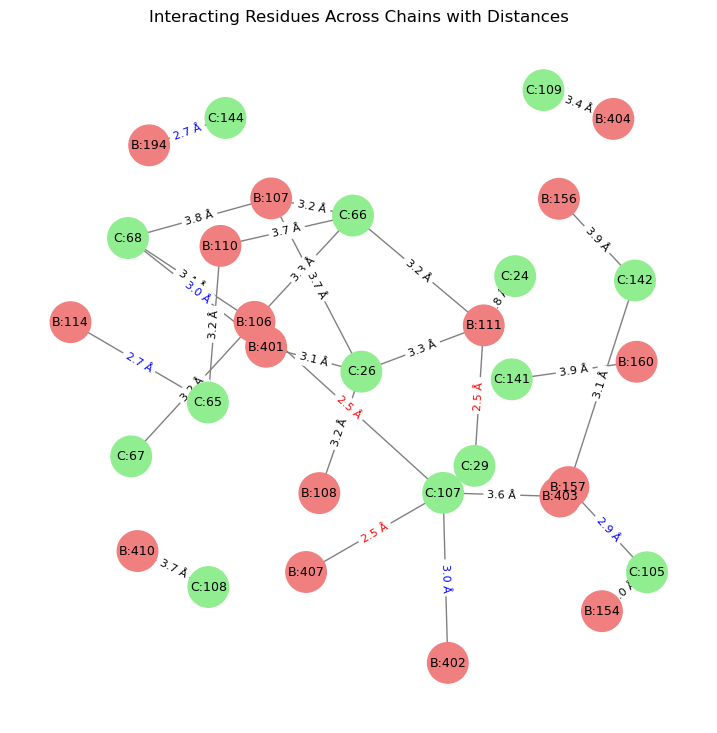

Parsing residues:   0%|          | 0/8896 [00:00<?, ?it/s]

Found interaction: ('A', 414) <-> ('C', 214) at distance 2.27 Å
Find residues complete
Strong H bonds (<= 3.0 Å): 1
Weak H bonds (> 3.0 Å): 0


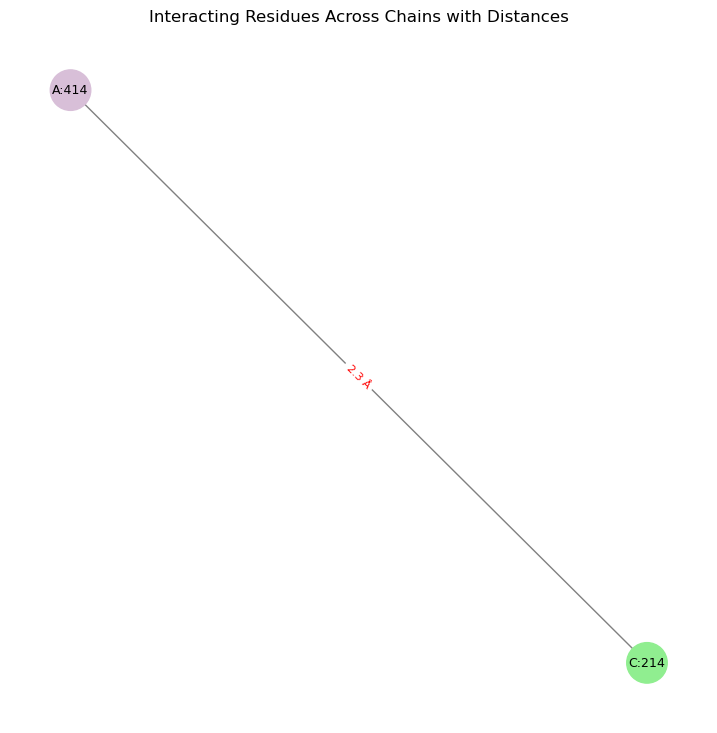

Parsing residues:   0%|          | 0/8899 [00:00<?, ?it/s]

Found interaction: ('B', 106) <-> ('C', 66) at distance 3.31 Å
Found interaction: ('B', 106) <-> ('C', 67) at distance 3.48 Å
Found interaction: ('B', 106) <-> ('C', 68) at distance 3.51 Å
Found interaction: ('B', 106) <-> ('C', 107) at distance 2.54 Å
Found interaction: ('B', 107) <-> ('C', 66) at distance 3.39 Å
Found interaction: ('B', 107) <-> ('C', 26) at distance 3.49 Å
Found interaction: ('B', 108) <-> ('C', 26) at distance 3.62 Å
Found interaction: ('B', 110) <-> ('C', 65) at distance 3.51 Å
Found interaction: ('B', 110) <-> ('C', 66) at distance 3.89 Å
Found interaction: ('B', 111) <-> ('C', 29) at distance 2.55 Å
Found interaction: ('B', 111) <-> ('C', 26) at distance 3.26 Å
Found interaction: ('B', 111) <-> ('C', 66) at distance 3.49 Å
Found interaction: ('B', 111) <-> ('C', 24) at distance 3.69 Å
Found interaction: ('B', 114) <-> ('C', 65) at distance 2.73 Å
Found interaction: ('B', 156) <-> ('C', 142) at distance 3.93 Å
Found interaction: ('B', 157) <-> ('C', 142) at dista

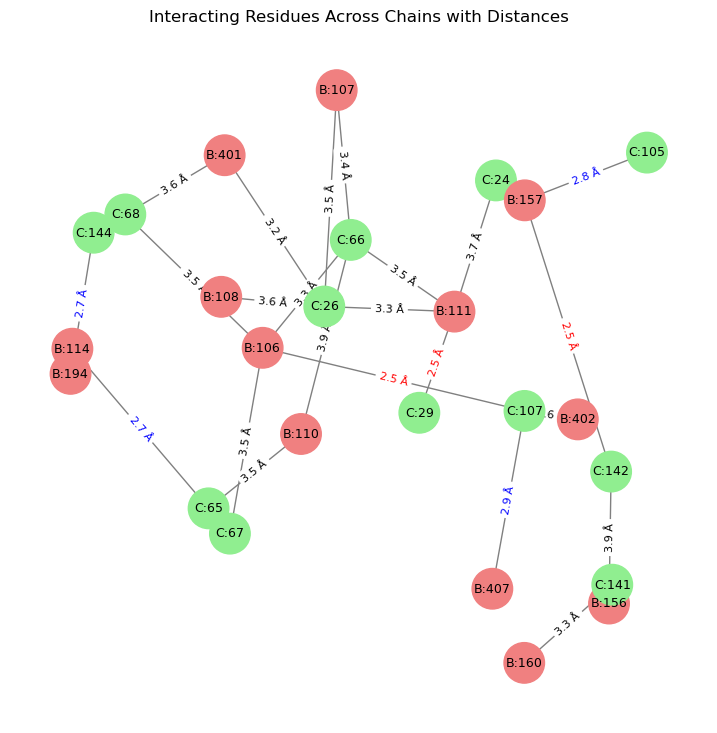

In [19]:
# Example usage
include_chainz = [('B','C')]
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"
atom_data = extract_3d_coordinates(cif_file_path)
interactions = find_interacting_residues(atom_data, cutoff=4.0,include_chains=include_chainz)

# Visualize interactions
visualize_interactions(interactions, save_path="/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 B and C interacting.png")


# Example usage
include_chainz = [('A','C')]
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"
atom_data = extract_3d_coordinates(cif_file_path)
interactions = find_interacting_residues(atom_data, cutoff=4.0,include_chains=include_chainz)

# Visualize interactions
visualize_interactions(interactions, save_path="/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 A and C interacting.png")


# Example usage
include_chainz = [('B','C')]
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 mor1-1/fold_tua4_tub4_mor1_1_model_0.cif"
atom_data = extract_3d_coordinates(cif_file_path)
interactions = find_interacting_residues(atom_data, cutoff=4.0,include_chains=include_chainz)

# Visualize interactions
visualize_interactions(interactions, save_path="/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-1 B and C interacting.png")


Parsing residues:   0%|          | 0/8899 [00:00<?, ?it/s]

Found interaction: ('A', 108) <-> ('C', 214) at distance 3.40 Å
Found interaction: ('A', 109) <-> ('C', 181) at distance 2.75 Å
Found interaction: ('A', 112) <-> ('C', 179) at distance 3.76 Å
Found interaction: ('A', 409) <-> ('C', 181) at distance 3.14 Å
Found interaction: ('A', 409) <-> ('C', 186) at distance 3.26 Å
Found interaction: ('A', 409) <-> ('C', 183) at distance 3.28 Å
Found interaction: ('A', 410) <-> ('C', 181) at distance 3.12 Å
Found interaction: ('A', 412) <-> ('C', 181) at distance 3.52 Å
Found interaction: ('A', 412) <-> ('C', 186) at distance 3.48 Å
Found interaction: ('A', 412) <-> ('C', 214) at distance 2.57 Å
Found interaction: ('A', 413) <-> ('C', 214) at distance 3.95 Å
Found interaction: ('A', 413) <-> ('C', 186) at distance 3.36 Å
Found interaction: ('A', 414) <-> ('C', 186) at distance 2.82 Å
Found interaction: ('A', 414) <-> ('C', 217) at distance 3.07 Å
Found interaction: ('A', 417) <-> ('C', 216) at distance 3.98 Å
Found interaction: ('A', 417) <-> ('C', 

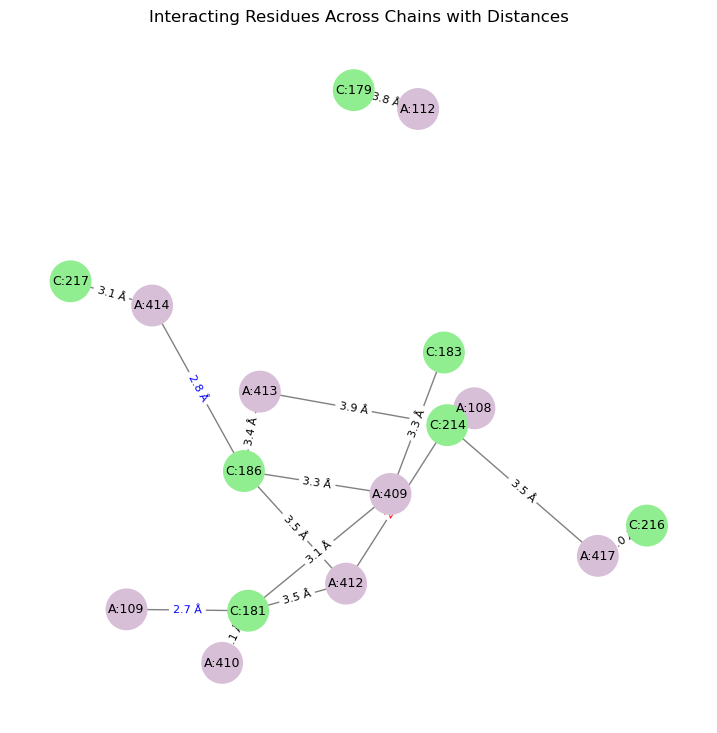

In [20]:

# Example usage
include_chainz = [('A','C')]
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 mor1-1/fold_tua4_tub4_mor1_1_model_0.cif"
atom_data = extract_3d_coordinates(cif_file_path)
interactions = find_interacting_residues(atom_data, cutoff=4.0,include_chains=include_chainz)

# Visualize interactions
visualize_interactions(interactions, save_path="/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-1 A and C interacting.png")

In [21]:
from Bio.PDB import MMCIFParser, Selection
from Bio.PDB.vectors import calc_angle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
from tqdm.notebook import tqdm

def extract_3d_coordinates(cif_file):
    """
    Extracts 3D coordinates with additional atomic information.
    """
    parser = MMCIFParser(QUIET=True)
    try:
        structure = parser.get_structure("protein", cif_file)
    except Exception as e:
        raise ValueError(f"Error parsing CIF file: {str(e)}")
    
    atom_data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                # Skip water molecules and heteroatoms
                if residue.id[0] != " ":
                    continue
                    
                for atom in residue:
                    # Store more detailed atomic information
                    atom_data.append({
                        "chain_id": chain.id,
                        "residue_id": residue.id[1],
                        "residue_name": residue.resname,
                        "atom_name": atom.name,
                        "element": atom.element,
                        "position": atom.coord,
                        "bfactor": atom.bfactor if hasattr(atom, "bfactor") else None
                    })
    return atom_data

def calculate_interaction_score(atom1, atom2, distance):
    """
    Calculate a weighted interaction score based on atom types and distance.
    """
    # Define interaction preferences
    strong_donors = set(['N', 'O'])
    strong_acceptors = set(['O', 'N'])
    
    # Base score from distance
    if distance <= 2.5:  # Very strong H-bond distance
        base_score = 1.0
    elif distance <= 3.2:  # Normal H-bond distance
        base_score = 0.8
    elif distance <= 4.0:  # VdW interaction distance
        base_score = 0.5
    else:
        base_score = 0.2
        
    # Bonus for potential hydrogen bonds
    if (atom1["element"] in strong_donors and atom2["element"] in strong_acceptors) or \
       (atom2["element"] in strong_donors and atom1["element"] in strong_acceptors):
        base_score *= 1.5
        
    return base_score

def find_interacting_residues(atom_data, cutoff=4.0, include_chains=None, min_score=0.3):
    """
    Identifies interacting residues using KD-tree for efficiency and scoring system.
    """
    # Convert atom positions to numpy array for KD-tree
    positions = np.array([atom["position"] for atom in atom_data])
    kdtree = cKDTree(positions)
    
    interactions = []
    interaction_scores = {}
    
    # Query pairs of points within cutoff distance
    pairs = kdtree.query_pairs(cutoff)
    
    for i, j in tqdm(pairs, desc="Analyzing interactions"):
        atom1, atom2 = atom_data[i], atom_data[j]
        
        # Skip if same chain or not in included chains
        if atom1["chain_id"] == atom2["chain_id"]:
            continue
            
        chain_pair = (atom1["chain_id"], atom2["chain_id"])
        if include_chains and chain_pair not in include_chains and chain_pair[::-1] not in include_chains:
            continue
        
        distance = np.linalg.norm(atom1["position"] - atom2["position"])
        score = calculate_interaction_score(atom1, atom2, distance)
        
        if score < min_score:
            continue
            
        residue_pair = tuple(sorted([
            (atom1["chain_id"], atom1["residue_id"], atom1["residue_name"]),
            (atom2["chain_id"], atom2["residue_id"], atom2["residue_name"])
        ]))
        
        # Update the highest score for this residue pair
        if residue_pair not in interaction_scores or score > interaction_scores[residue_pair][1]:
            interaction_scores[residue_pair] = (distance, score)
    
    # Convert scores to interactions list
    for residue_pair, (distance, score) in interaction_scores.items():
        interactions.append((
            residue_pair[0],
            residue_pair[1],
            distance,
            score
        ))
    
    return interactions

def visualize_interactions(interactions, save_path=None, min_score=0.3):
    """
    Enhanced visualization with interaction scores and residue types.
    """
    G = nx.Graph()
    
    for interaction in interactions:
        (chain1, res1, res_name1), (chain2, res2, res_name2), distance, score = interaction
        if score < min_score:
            continue
            
        node1 = f"{chain1}:{res_name1}{res1}"
        node2 = f"{chain2}:{res_name2}{res2}"
        G.add_node(node1, chain=chain1, residue_name=res_name1)
        G.add_node(node2, chain=chain2, residue_name=res_name2)
        G.add_edge(node1, node2, weight=distance, score=score)
    
    # Color scheme based on chemical properties
    def get_residue_color(res_name):
        if res_name in {'ARG', 'LYS', 'HIS'}:  # Positive
            return 'lightcoral'
        elif res_name in {'ASP', 'GLU'}:  # Negative
            return 'lightblue'
        elif res_name in {'SER', 'THR', 'ASN', 'GLN'}:  # Polar
            return 'lightgreen'
        elif res_name in {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}:  # Hydrophobic
            return 'khaki'
        else:
            return 'white'
    
    node_colors = [get_residue_color(G.nodes[node]['residue_name']) for node in G.nodes]
    
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=2.0, iterations=100)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
    
    # Draw edges with varying thickness based on interaction score
    edge_weights = [G[u][v]['score'] * 2 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6)
    
    nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Add edge labels with distances and scores
    edge_labels = {(u, v): f"{d['weight']:.1f}Å\n{d['score']:.2f}" 
                  for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)
    
    plt.title("Protein-Protein Interactions\nNode colors: Red=Positive, Blue=Negative, Green=Polar, Yellow=Hydrophobic")
    plt.axis('off')
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

Analyzing interactions:   0%|          | 0/52361 [00:00<?, ?it/s]

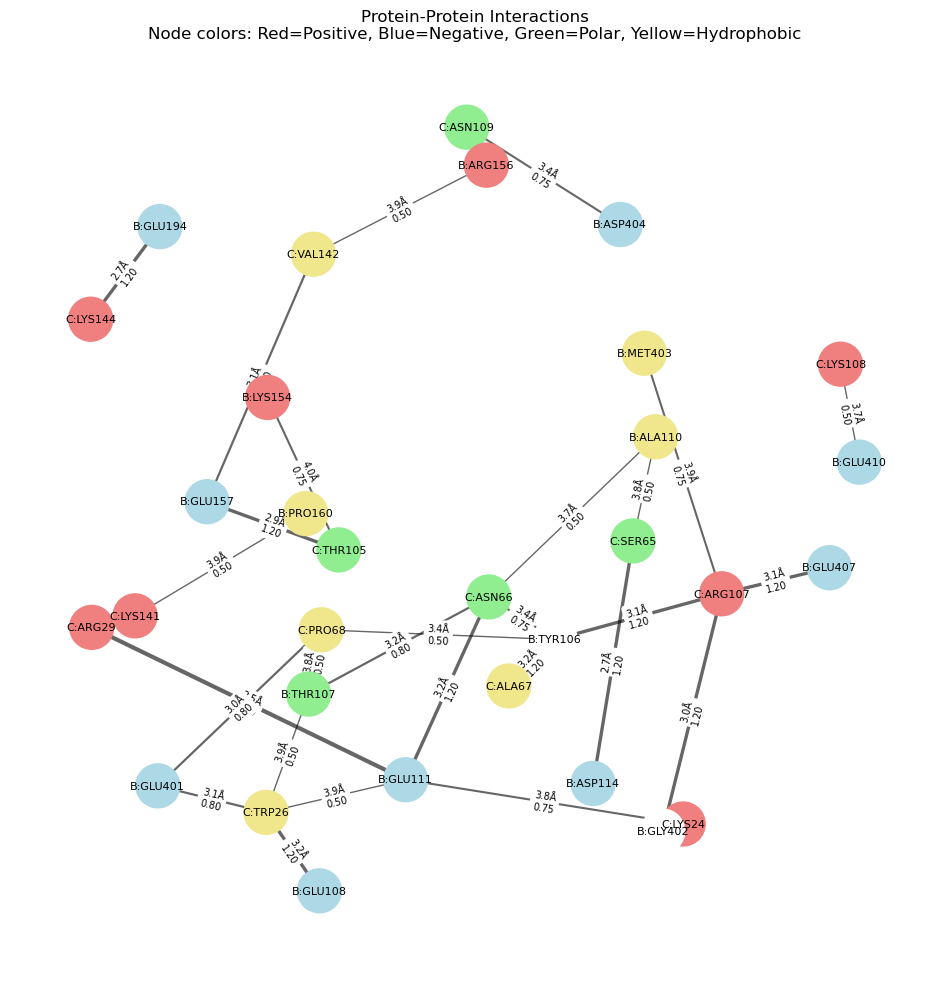

In [22]:
# Path to your file
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"

# 1. Extract coordinates
atom_data = extract_3d_coordinates(cif_file_path)

# 2. Find interactions
# If you want to look at specific chains (e.g., between B and C):
interactions = find_interacting_residues(
    atom_data, 
    cutoff=4.0,  # Distance cutoff in Angstroms
    include_chains=[('B', 'C')],  # Only look at interactions between chains B and C
    min_score=0.3  # Minimum interaction score to consider
)

# 3. Visualize the results
# You can optionally specify a save path for the figure
visualize_interactions(
    interactions,
    save_path="protein_interactions.png",  # Optional: remove this if you just want to display
    min_score=0.3
)

Analyzing interactions:   0%|          | 0/52361 [00:00<?, ?it/s]

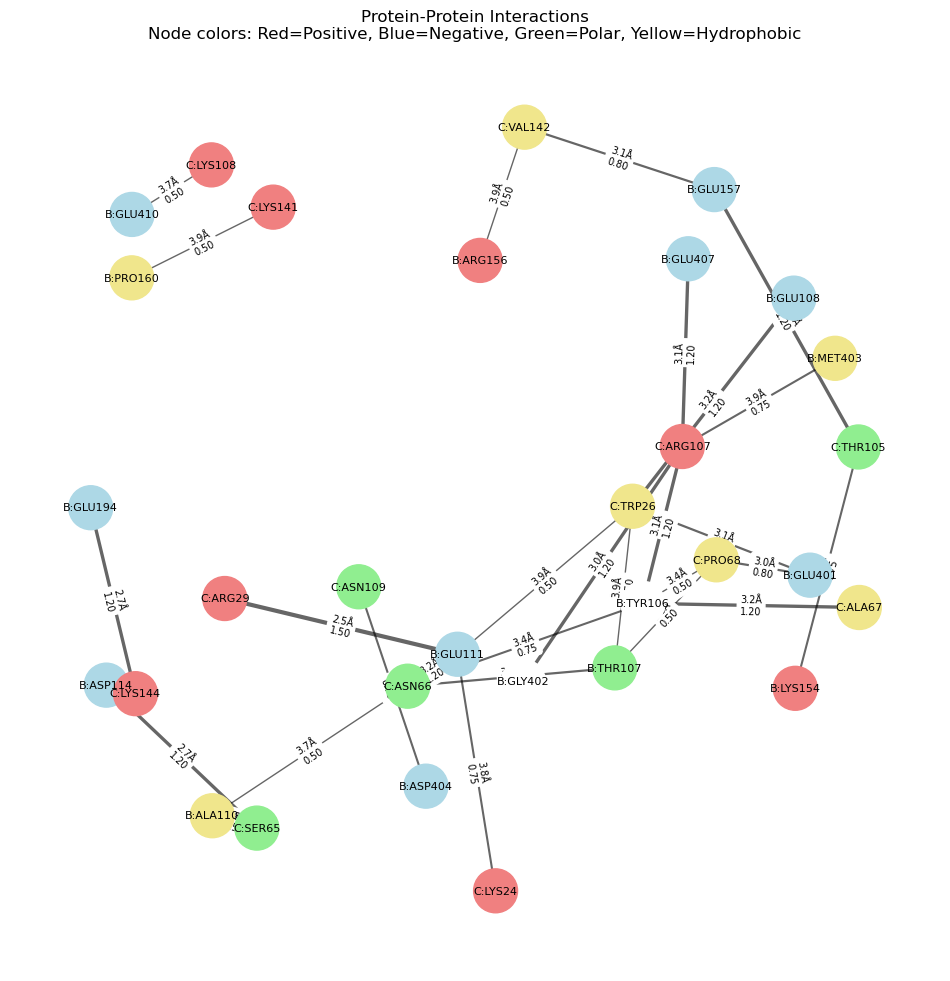

In [23]:
# Path to your file
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"

# 1. Extract coordinates
atom_data = extract_3d_coordinates(cif_file_path)

# 2. Find interactions
# If you want to look at specific chains (e.g., between B and C):
interactions = find_interacting_residues(
    atom_data, 
    cutoff=4.0,  # Distance cutoff in Angstroms
    include_chains=[('B', 'C')],  # Only look at interactions between chains B and C
    min_score=0.3  # Minimum interaction score to consider
)

# 3. Visualize the results
# You can optionally specify a save path for the figure
visualize_interactions(
    interactions,
    save_path="protein_interactions.png",  # Optional: remove this if you just want to display
    min_score=0.3
)

In [24]:
# ACTUAL FINAL
# THE PROGRAM ISN'T SHOWING AMINO ACID RESIDUES WHEN THEY HAVE MULTIPLE H BONDS BETWEEN DIFF ATOMS

from Bio.PDB import MMCIFParser, Selection
from Bio.PDB.vectors import calc_angle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def extract_3d_coordinates(cif_file):
    """
    Extracts 3D coordinates with additional atomic information.
    """
    parser = MMCIFParser(QUIET=True)
    try:
        structure = parser.get_structure("protein", cif_file)
    except Exception as e:
        raise ValueError(f"Error parsing CIF file: {str(e)}")
    
    atom_data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                # Skip water molecules and heteroatoms
                if residue.id[0] != " ":
                    continue
                    
                for atom in residue:
                    # Store more detailed atomic information
                    atom_data.append({
                        "chain_id": chain.id,
                        "residue_id": residue.id[1],
                        "residue_name": residue.resname,
                        "atom_name": atom.name,
                        "element": atom.element,
                        "position": atom.coord,
                        "bfactor": atom.bfactor if hasattr(atom, "bfactor") else None
                    })
    return atom_data

from Bio.PDB.vectors import Vector

def is_hydrogen_bond_possible(atom1, atom2):
    """
    Check if two atoms are capable of forming a hydrogen bond.
    Criteria:
    1. Must have potential donor and acceptor atoms
    2. Distance between atoms must be reasonable
    3. Angle between donor-hydrogen-acceptor must be physically plausible (>120°)
    """
    donors = set(['N', 'O'])  # Common hydrogen bond donors
    acceptors = set(['N', 'O'])  # Common hydrogen bond acceptors

    if atom1["element"] in donors and atom2["element"] in acceptors:
        donor_atom, acceptor_atom = atom1, atom2
    elif atom2["element"] in donors and atom1["element"] in acceptors:
        donor_atom, acceptor_atom = atom2, atom1
    else:
        return False, "invalid"

    # Check distance
    distance = np.linalg.norm(donor_atom["position"] - acceptor_atom["position"])
    if distance > 4.0 or distance < 2.5:  # Typical hydrogen bond distance range
        return False, "weak"

    # Check angle
    # Assume the hydrogen atom is near the donor atom. Use an approximate hydrogen position.
    # For simplicity, we'll estimate the hydrogen position as slightly offset along the donor vector.
    hydrogen_position = donor_atom["position"] + 0.1 * (acceptor_atom["position"] - donor_atom["position"])

    vector_dh = Vector(hydrogen_position - donor_atom["position"])
    vector_ha = Vector(acceptor_atom["position"] - hydrogen_position)

    angle = calc_angle(Vector(donor_atom["position"]),
                       Vector(hydrogen_position),
                       Vector(acceptor_atom["position"]))

    if np.degrees(angle) < 120:
        return False, "weak"

    return True, "valid"




def calculate_interaction_score(atom1, atom2, distance):
    """
    Calculate a weighted interaction score based on atom types and distance.
    
    Returns:
    - Base score 
    - H-bond type (strong, normal, or weak)
    """
    # Check if H-bond is possible first
    h_bond_possible, h_bond_type = is_hydrogen_bond_possible(atom1, atom2)
    
    if not h_bond_possible:
        return 0.0, 'weak'
    
    # # Base score from distance
    # if distance <= 2.8:  # Very strong H-bond distance
    #     base_score = 1.0
    #     h_bond_type = 'strong'
    # elif distance <= 3.3:  # Normal H-bond distance
    #     base_score = 0.8
    #     h_bond_type = 'normal'
    # elif distance <= 4.0:  # VdW interaction distance
    #     base_score = 0.5
    #     h_bond_type = 'weak'
    # else:
    #     base_score = 0.2
    #     h_bond_type = 'weak'
        

    """
    Calculate the hydrogen bond score based on the inverse square of the distance.
    
    Parameters:
    - distance (float): The distance between donor and acceptor atoms.
    
    Returns:
    - base_score (float): Calculated score inversely proportional to distance^2.
    - h_bond_type (str): Classification of the bond strength ('strong', 'normal', 'weak').
    """
    if distance <= 2.8:  # Very strong H-bond distance
        h_bond_type = 'strong'
    elif distance <= 3.3:  # Normal H-bond distance
        h_bond_type = 'normal'
    elif distance <= 4.0:  # Weak H-bond distance
        h_bond_type = 'weak'
    else:  # Outside typical H-bond range
        h_bond_type = 'weak'

    # Calculate base score inversely proportional to distance^2
    if distance > 0:  # Avoid division by zero
        base_score = 1 / (distance ** 2)
    else:
        base_score = 0.0


    # Atom-specific weighting https://chem.libretexts.org/Courses/University_of_Missouri/MU%3A__1330H_(Keller)/08._Basic_Concepts_of_Chemical_Bonding/8.8%3A_Strength_of_Covalent_Bonds
    atom_pair_weights = {
        ('N', 'O'): 1.0,  # Strongest interactions #201
        ('O', 'O'): 0.7, #142
        ('N', 'N'): 0.8, # 167
        ('N', 'S'): 0.7,  # Weaker interactions
        ('O', 'S'): 0.6
    }

    atom_score = atom_pair_weights.get((atom1['element'], atom2['element']), 0.5)

    # Final score calculation
    final_score = base_score * atom_score


    
    return final_score, h_bond_type


def find_interacting_residues(atom_data, cutoff=4.0, include_chains=None, min_score=0.45):
    """
    Identifies interacting residues using KD-tree for efficiency and scoring system.
    Tracks all interactions without overwriting cases where multiple H-bonds exist.
    """
    positions = np.array([atom["position"] for atom in atom_data])
    kdtree = cKDTree(positions)
    
    interactions = []
    
    pairs = kdtree.query_pairs(cutoff)
    
    for i, j in tqdm(pairs, desc="Analyzing interactions"):
        atom1, atom2 = atom_data[i], atom_data[j]
        
        # Skip if same chain or not in included chains
        if atom1["chain_id"] == atom2["chain_id"]:
            continue
            
        chain_pair = (atom1["chain_id"], atom2["chain_id"])
        if include_chains and chain_pair not in include_chains and chain_pair[::-1] not in include_chains:
            continue
        
        distance = np.linalg.norm(atom1["position"] - atom2["position"])
        score, h_bond_type = calculate_interaction_score(atom1, atom2, distance)
        
        if score < min_score:
            continue
        
        interaction = {
            "residue1": (atom1["chain_id"], atom1["residue_id"], atom1["residue_name"], atom1["atom_name"]),
            "residue2": (atom2["chain_id"], atom2["residue_id"], atom2["residue_name"], atom2["atom_name"]),
            "distance": distance,
            "score": score,
            "h_bond_type": h_bond_type,
            "atoms": (atom1["atom_name"], atom2["atom_name"])
        }
        
        interactions.append(interaction)
    
    return interactions

def predict_interaction_probability(interactions):
    """
    Build a logistic regression model to predict interaction likelihood
    """
    # Feature engineering
    X = np.array([
        [
            interaction['distance'], 
            1 if interaction['h_bond_type'] == 'strong' else 0,
            interaction['score']
        ] 
        for interaction in interactions
    ])
    
    # Binary target: strong interaction or not
    y = np.array([1 if interaction['h_bond_type'] == 'strong' else 0 for interaction in interactions])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return {
        'model': model,
        'training_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test)
    }

def visualize_interactions(interactions, save_path=None, min_score=0.45):
    """
    Enhanced visualization with:
    1. Chain-based node colors
    2. Chemical property borders
    3. H-bond type color coding for edge labels
    4. Improved layout to minimize node overlap
    5. Detailed interaction breakdown
    """
    G = nx.Graph()
    
    for interaction in interactions:
        if interaction['score'] < min_score:
            continue
            
        node1 = f"{interaction['residue1'][0]}:{interaction['residue1'][2]}{interaction['residue1'][1]}"
        node2 = f"{interaction['residue2'][0]}:{interaction['residue2'][2]}{interaction['residue2'][1]}"
        G.add_node(node1, chain=interaction['residue1'][0], residue_name=interaction['residue1'][2])
        G.add_node(node2, chain=interaction['residue2'][0], residue_name=interaction['residue2'][2])
        G.add_edge(node1, node2, 
                   weight=interaction['distance'], 
                   score=interaction['score'],
                   h_bond_type=interaction['h_bond_type'],
                   atoms=interaction['atoms'])
    
    # Chain-based colors
    chain_colors = {
        'A': 'thistle',     # light purple
        'B': 'lightcoral',  # light red
        'C': 'lightgreen'   # light green
    }
    
    # Chemical property border colors
    def get_border_color(res_name):
        if res_name in {'ARG', 'LYS', 'HIS'}:  # Positive
            return 'red'
        elif res_name in {'ASP', 'GLU'}:  # Negative
            return 'blue'
        elif res_name in {'SER', 'THR', 'ASN', 'GLN'}:  # Polar
            return 'green'
        elif res_name in {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}:  # Hydrophobic
            return 'goldenrod'
        else:
            return 'black'
    
    plt.figure(figsize=(10, 10))
    
    # Improved layout to minimize overlap
    pos = nx.spring_layout(G, k=3, iterations=200, seed=42)
    
    # Draw nodes with chain-based colors
    for node in G.nodes():
        chain = G.nodes[node]['chain']
        residue_name = G.nodes[node]['residue_name']
        
        nx.draw_networkx_nodes(G, pos,
                             nodelist=[node],
                             node_color=chain_colors[chain],
                             node_size=1000,
                             edgecolors=get_border_color(residue_name),
                             linewidths=2)
    
    # Draw edges
    for u, v, data in G.edges(data=True):
        # Color edges based on H-bond type
        if data['h_bond_type'] == 'strong':
            edge_color = 'red'
        elif data['h_bond_type'] == 'normal':
            edge_color = 'blue'
        else:
            edge_color = 'black'
        
        nx.draw_networkx_edges(G, pos, 
                                edgelist=[(u, v)], 
                                width=data['score'] * 2, 
                                alpha=0.6,
                                edge_color=edge_color)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=6)
    
    # Edge labels now use the distance label, with potentially colored based on H-bond type
    edge_labels = {(u, v): f"{d['weight']:.1f}Å" 
                   for u, v, d in G.edges(data=True)}
     
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=6)
    
    # Detailed interaction breakdown
    print("Detailed Interaction Breakdown:")
    print("-" * 50)
   
    # Legend elements (same as before)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=f'Chain A',
                  markerfacecolor=chain_colors['A'], markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label=f'Chain B',
                  markerfacecolor=chain_colors['B'], markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label=f'Chain C',
                  markerfacecolor=chain_colors['C'], markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Positive',
                  markerfacecolor='white', markeredgecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Negative',
                  markerfacecolor='white', markeredgecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Polar',
                  markerfacecolor='white', markeredgecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Hydrophobic',
                  markerfacecolor='white', markeredgecolor='goldenrod', markersize=10)
    ]

    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.title("Protein-Protein Interactions\nNode colors by chain, borders by chemical properties")
    plt.axis('off')
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def count_hbond_types(interactions):
    """
        Count the number of strong, normal, and weak H-bonds
    """
    bond_counts = {
        'strong': 0,
        'normal': 0,
        'weak': 0
    }
    
    for interaction in interactions:
        bond_type = interaction['h_bond_type']
        bond_counts[bond_type] += 1
    
    return bond_counts




Analyzing interactions:   0%|          | 0/52361 [00:00<?, ?it/s]

H-Bond Type Counts:
Strong H-Bonds: 0
Normal H-Bonds: 0
Weak H-Bonds: 0
Detailed Interaction Breakdown:
--------------------------------------------------


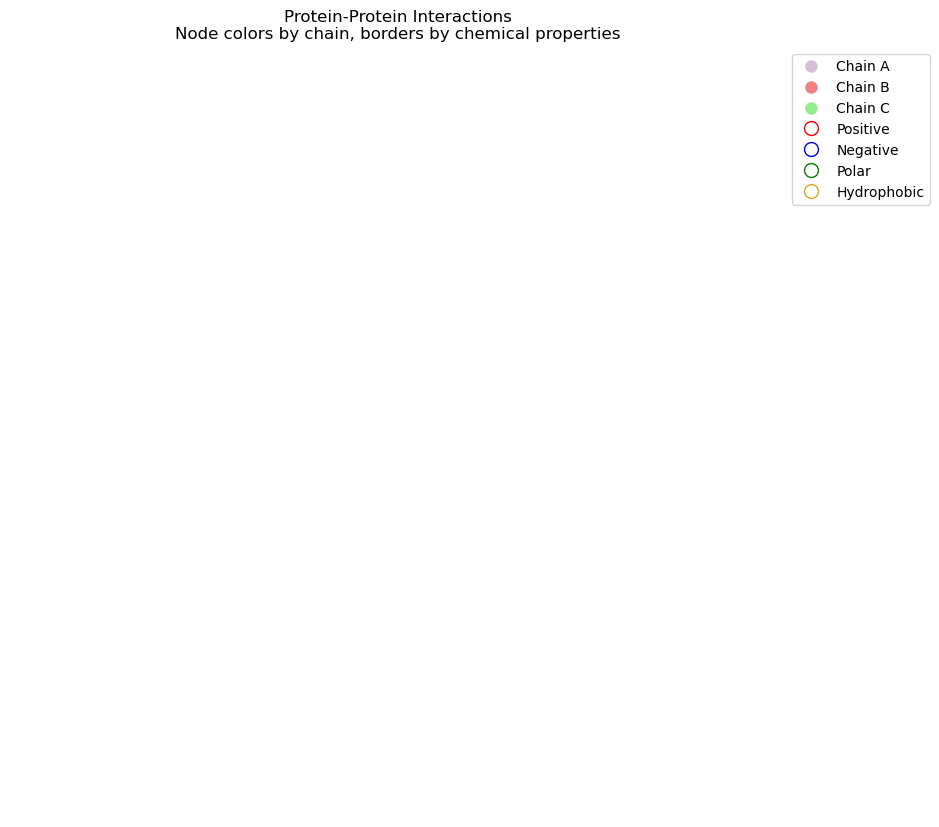

In [25]:
# MOR1 beta tubulin 

def main():
    # Path to your CIF file
    cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"

    # 1. Extract atomic coordinates
    atom_data = extract_3d_coordinates(cif_file_path)

    # 2. Find interactions between specific chains
    interactions = find_interacting_residues(
        atom_data, 
        cutoff=4.0,  # Distance cutoff in Angstroms
        include_chains=[('B', 'C')],  # Only look at interactions between chains B and C
        min_score=0.3  # Minimum interaction score to consider
    )

    
    # Count H-bond types
    hbond_counts = count_hbond_types(interactions)
    print("H-Bond Type Counts:")
    for bond_type, count in hbond_counts.items():
        print(f"{bond_type.capitalize()} H-Bonds: {count}")

    # 3. Visualize interactions
    visualize_interactions(
        interactions,
        save_path="protein_interactions.png",
        min_score=0.
    )

    # 4. Additional Analysis Functions
    
    # # Find strongest interactions per residue pair
    # strongest_interactions = find_strongest_interactions(interactions)
    # print("\nStrongest Interactions:")
    # for interaction in strongest_interactions:
    #     print(f"Residues: {interaction['residue1'][2]}{interaction['residue1'][1]} - {interaction['residue2'][2]}{interaction['residue2'][1]}")
    #     print(f"Distance: {interaction['distance']:.2f}Å")
    #     print(f"Score: {interaction['score']:.2f}")
    #     print(f"H-Bond Type: {interaction['h_bond_type']}\n")



    
if __name__ == "__main__":
    main()

In [26]:
print(f"Total interactions found: {len(interactions)}")
if interactions:
    print(interactions[:5])  # Print first 5 interactions to verify structure

try:
    visualize_interactions(interactions, save_path="protein_interactions.png", min_score=0.3)
except Exception as e:
    print(f"Visualization Error: {e}")


Total interactions found: 28
[(('B', 110, 'ALA'), ('C', 65, 'SER'), 3.767703, 0.5), (('B', 111, 'GLU'), ('C', 66, 'ASN'), 3.187722, 1.2000000000000002), (('B', 407, 'GLU'), ('C', 107, 'ARG'), 3.0537183, 1.2000000000000002), (('B', 401, 'GLU'), ('C', 26, 'TRP'), 3.096369, 0.8), (('B', 107, 'THR'), ('C', 66, 'ASN'), 3.1639829, 0.8)]
Visualization Error: tuple indices must be integers or slices, not str


In [27]:
from Bio.PDB.vectors import Vector, calc_angle
import numpy as np

def list_hydrogen_bonds(atom_data, residue1_id, chain1, residue2_id, chain2):
    """
    List all potential H-bonds between two specific residues.

    Parameters:
    - atom_data: List of atoms extracted from the structure.
    - residue1_id: Residue ID of the first residue.
    - chain1: Chain ID of the first residue.
    - residue2_id: Residue ID of the second residue.
    - chain2: Chain ID of the second residue.
    """
    # Potential donors and acceptors
    donors = {'N', 'O'}
    acceptors = {'N', 'O'}

    # Filter atoms by residue and chain
    atoms_residue1 = [
        atom for atom in atom_data
        if atom['chain_id'] == chain1 and atom['residue_id'] == residue1_id
    ]
    
    atoms_residue2 = [
        atom for atom in atom_data
        if atom['chain_id'] == chain2 and atom['residue_id'] == residue2_id
    ]

    potential_hbonds = []

    # Compare each atom in residue1 with each atom in residue2
    for atom1 in atoms_residue1:
        for atom2 in atoms_residue2:
            # Check donor and acceptor compatibility
            if atom1['element'] in donors and atom2['element'] in acceptors:
                donor_atom, acceptor_atom = atom1, atom2
            elif atom2['element'] in donors and atom1['element'] in acceptors:
                donor_atom, acceptor_atom = atom2, atom1
            else:
                continue

            # Calculate distance
            distance = np.linalg.norm(donor_atom['position'] - acceptor_atom['position'])

            # Estimate hydrogen position (if explicit H is absent)
            hydrogen_position = donor_atom['position'] + 0.1 * (acceptor_atom['position'] - donor_atom['position'])

            # Calculate angle
            angle = calc_angle(
                Vector(donor_atom['position']),
                Vector(hydrogen_position),
                Vector(acceptor_atom['position'])
            )
            angle_deg = np.degrees(angle)

            # Save H-bond info
            potential_hbonds.append({
                'donor': donor_atom['atom_name'],
                'acceptor': acceptor_atom['atom_name'],
                'distance': distance,
                'angle': angle_deg
            })

    # Print potential H-bonds
    print(f"Potential H-Bonds between {chain1}{residue1_id} and {chain2}{residue2_id}:")
    for hbond in potential_hbonds:
        print(f"Donor: {hbond['donor']}, Acceptor: {hbond['acceptor']}, Distance: {hbond['distance']:.2f} Å, Angle: {hbond['angle']:.2f}°")

# Example call to debug the specified residues
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"
atom_data = extract_3d_coordinates(cif_file_path)
list_hydrogen_bonds(atom_data, residue1_id=214, chain1='C', residue2_id=414, chain2='A')

Potential H-Bonds between C214 and A414:
Donor: N, Acceptor: N, Distance: 11.83 Å, Angle: 180.00°
Donor: N, Acceptor: O, Distance: 13.38 Å, Angle: 180.00°
Donor: N, Acceptor: OE1, Distance: 7.00 Å, Angle: 180.00°
Donor: N, Acceptor: OE2, Distance: 8.50 Å, Angle: 180.00°
Donor: O, Acceptor: N, Distance: 12.31 Å, Angle: 180.00°
Donor: O, Acceptor: O, Distance: 13.33 Å, Angle: 180.00°
Donor: O, Acceptor: OE1, Distance: 7.47 Å, Angle: 180.00°
Donor: O, Acceptor: OE2, Distance: 8.31 Å, Angle: 180.00°
Donor: NE, Acceptor: N, Distance: 7.28 Å, Angle: 180.00°
Donor: NE, Acceptor: O, Distance: 9.48 Å, Angle: 180.00°
Donor: NE, Acceptor: OE1, Distance: 3.32 Å, Angle: 180.00°
Donor: NE, Acceptor: OE2, Distance: 5.51 Å, Angle: 180.00°
Donor: NH1, Acceptor: N, Distance: 5.69 Å, Angle: 180.00°
Donor: NH1, Acceptor: O, Distance: 7.95 Å, Angle: 180.00°
Donor: NH1, Acceptor: OE1, Distance: 2.27 Å, Angle: 180.00°
Donor: NH1, Acceptor: OE2, Distance: 4.21 Å, Angle: 180.00°
Donor: NH2, Acceptor: N, Distan

In [28]:
# ACTUAL FINAL
# THE PROGRAM ISN'T SHOWING AMINO ACID RESIDUES WHEN THEY HAVE MULTIPLE H BONDS BETWEEN DIFF ATOMS

from Bio.PDB import MMCIFParser, Selection
from Bio.PDB.vectors import calc_angle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def extract_3d_coordinates(cif_file):
    """
    Extracts 3D coordinates with additional atomic information.
    """
    parser = MMCIFParser(QUIET=True)
    try:
        structure = parser.get_structure("protein", cif_file)
    except Exception as e:
        raise ValueError(f"Error parsing CIF file: {str(e)}")
    
    atom_data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                # Skip water molecules and heteroatoms
                if residue.id[0] != " ":
                    continue
                    
                for atom in residue:
                    # Store more detailed atomic information
                    atom_data.append({
                        "chain_id": chain.id,
                        "residue_id": residue.id[1],
                        "residue_name": residue.resname,
                        "atom_name": atom.name,
                        "element": atom.element,
                        "position": atom.coord,
                        "bfactor": atom.bfactor if hasattr(atom, "bfactor") else None
                    })
    return atom_data

from Bio.PDB.vectors import Vector

def is_hydrogen_bond_possible(atom1, atom2):
    """
    Check if two atoms are capable of forming a hydrogen bond.
    Criteria:
    1. Must have potential donor and acceptor atoms
    2. Distance between atoms must be reasonable
    3. Angle between donor-hydrogen-acceptor must be physically plausible (>120°)
    """
    donors = set(['N', 'O'])  # Common hydrogen bond donors
    acceptors = set(['N', 'O'])  # Common hydrogen bond acceptors

    if atom1["element"] in donors and atom2["element"] in acceptors:
        donor_atom, acceptor_atom = atom1, atom2
    elif atom2["element"] in donors and atom1["element"] in acceptors:
        donor_atom, acceptor_atom = atom2, atom1
    else:
        return False, "invalid"

    # Check distance
    distance = np.linalg.norm(donor_atom["position"] - acceptor_atom["position"])
    if distance > 4.0 or distance < 2.5:  # Typical hydrogen bond distance range
        return False, "weak"

    # Check angle
    # Assume the hydrogen atom is near the donor atom. Use an approximate hydrogen position.
    # For simplicity, we'll estimate the hydrogen position as slightly offset along the donor vector.
    hydrogen_position = donor_atom["position"] + 0.1 * (acceptor_atom["position"] - donor_atom["position"])

    vector_dh = Vector(hydrogen_position - donor_atom["position"])
    vector_ha = Vector(acceptor_atom["position"] - hydrogen_position)

    angle = calc_angle(Vector(donor_atom["position"]),
                       Vector(hydrogen_position),
                       Vector(acceptor_atom["position"]))

    if np.degrees(angle) < 120:
        return False, "weak"

    return True, "valid"




def calculate_interaction_score(atom1, atom2, distance):
    """
    Calculate a weighted interaction score based on atom types and distance.
    
    Returns:
    - Base score 
    - H-bond type (strong, normal, or weak)
    """
    # Check if H-bond is possible first
    h_bond_possible, h_bond_type = is_hydrogen_bond_possible(atom1, atom2)
    
    if not h_bond_possible:
        return 0.0, 'weak'
    
    # # Base score from distance
    # if distance <= 2.8:  # Very strong H-bond distance
    #     base_score = 1.0
    #     h_bond_type = 'strong'
    # elif distance <= 3.3:  # Normal H-bond distance
    #     base_score = 0.8
    #     h_bond_type = 'normal'
    # elif distance <= 4.0:  # VdW interaction distance
    #     base_score = 0.5
    #     h_bond_type = 'weak'
    # else:
    #     base_score = 0.2
    #     h_bond_type = 'weak'
        

    """
    Calculate the hydrogen bond score based on the inverse square of the distance.
    
    Parameters:
    - distance (float): The distance between donor and acceptor atoms.
    
    Returns:
    - base_score (float): Calculated score inversely proportional to distance^2.
    - h_bond_type (str): Classification of the bond strength ('strong', 'normal', 'weak').
    """
    if distance <= 2.8:  # Very strong H-bond distance
        h_bond_type = 'strong'
    elif distance <= 3.3:  # Normal H-bond distance
        h_bond_type = 'normal'
    elif distance <= 4.0:  # Weak H-bond distance
        h_bond_type = 'weak'
    else:  # Outside typical H-bond range
        h_bond_type = 'weak'

    # Calculate base score inversely proportional to distance^2
    if distance > 0:  # Avoid division by zero
        base_score = 1 / (distance ** 2)
    else:
        base_score = 0.0


    # Atom-specific weighting https://chem.libretexts.org/Courses/University_of_Missouri/MU%3A__1330H_(Keller)/08._Basic_Concepts_of_Chemical_Bonding/8.8%3A_Strength_of_Covalent_Bonds
    atom_pair_weights = {
        ('N', 'O'): 1.0,  # Strongest interactions #201
        ('O', 'O'): 0.7, #142
        ('N', 'N'): 0.8, # 167
        ('N', 'S'): 0.7,  # Weaker interactions
        ('O', 'S'): 0.6
    }

    atom_score = atom_pair_weights.get((atom1['element'], atom2['element']), 0.5)

    # Final score calculation
    final_score = base_score * atom_score


    
    return final_score, h_bond_type


def find_interacting_residues(atom_data, cutoff=4.0, include_chains=None, min_score=0.45):
    """
    Identifies interacting residues using KD-tree for efficiency and scoring system.
    Tracks all interactions without overwriting cases where multiple H-bonds exist.
    """
    positions = np.array([atom["position"] for atom in atom_data])
    kdtree = cKDTree(positions)
    
    interactions = []
    
    pairs = kdtree.query_pairs(cutoff)
    
    for i, j in tqdm(pairs, desc="Analyzing interactions"):
        atom1, atom2 = atom_data[i], atom_data[j]
        
        # Skip if same chain or not in included chains
        if atom1["chain_id"] == atom2["chain_id"]:
            continue
            
        chain_pair = (atom1["chain_id"], atom2["chain_id"])
        if include_chains and chain_pair not in include_chains and chain_pair[::-1] not in include_chains:
            continue
        
        distance = np.linalg.norm(atom1["position"] - atom2["position"])
        score, h_bond_type = calculate_interaction_score(atom1, atom2, distance)
        
        if score < min_score:
            continue
        
        interaction = {
            "residue1": (atom1["chain_id"], atom1["residue_id"], atom1["residue_name"], atom1["atom_name"]),
            "residue2": (atom2["chain_id"], atom2["residue_id"], atom2["residue_name"], atom2["atom_name"]),
            "distance": distance,
            "score": score,
            "h_bond_type": h_bond_type,
            "atoms": (atom1["atom_name"], atom2["atom_name"])
        }
        
        interactions.append(interaction)
    
    return interactions

def predict_interaction_probability(interactions):
    """
    Build a logistic regression model to predict interaction likelihood
    """
    # Feature engineering
    X = np.array([
        [
            interaction['distance'], 
            1 if interaction['h_bond_type'] == 'strong' else 0,
            interaction['score']
        ] 
        for interaction in interactions
    ])
    
    # Binary target: strong interaction or not
    y = np.array([1 if interaction['h_bond_type'] == 'strong' else 0 for interaction in interactions])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return {
        'model': model,
        'training_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test)
    }

def visualize_interactions(interactions, save_path=None, min_score=0.45):
    """
    Visualizes interactions with the correct tuple structure handling.
    """
    G = nx.Graph()
    
    for interaction in interactions:
        try:
            residue1, residue2, distance, score = interaction
            
            # Skip interactions below the minimum score
            if score < min_score:
                continue
            
            # Define nodes for the residues
            node1 = f"{residue1[0]}:{residue1[2]}{residue1[1]}"
            node2 = f"{residue2[0]}:{residue2[2]}{residue2[1]}"
            
            # Add nodes and edges to the graph
            G.add_node(node1, chain=residue1[0], residue_name=residue1[2])
            G.add_node(node2, chain=residue2[0], residue_name=residue2[2])
            G.add_edge(node1, node2, weight=distance, score=score)
        except Exception as e:
            print(f"Error processing interaction: {interaction}, Error: {e}")
    
    # Check if graph has data
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print("No interactions to visualize.")
        return
    
    # Chain-based colors
    chain_colors = {'A': 'thistle', 'B': 'lightcoral', 'C': 'lightgreen'}
    def get_border_color(res_name):
        if res_name in {'ARG', 'LYS', 'HIS'}:
            return 'red'
        elif res_name in {'ASP', 'GLU'}:
            return 'blue'
        elif res_name in {'SER', 'THR', 'ASN', 'GLN'}:
            return 'green'
        elif res_name in {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}:
            return 'goldenrod'
        return 'black'
    
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=3, iterations=200, seed=42)
    
    # Draw nodes
    for node in G.nodes():
        chain = G.nodes[node]['chain']
        residue_name = G.nodes[node]['residue_name']
        nx.draw_networkx_nodes(G, pos, nodelist=[node],
                               node_color=chain_colors.get(chain, 'gray'),
                               node_size=1000,
                               edgecolors=get_border_color(residue_name),
                               linewidths=2)
    
    # Draw edges
    for u, v, data in G.edges(data=True):
        edge_color = 'black'
        if data['score'] > 1.0:  # Strong interaction
            edge_color = 'red'
        elif data['score'] > 0.7:  # Moderate interaction
            edge_color = 'blue'
        
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], 
                               width=data['score'] * 2, alpha=0.6, edge_color=edge_color)
    
    nx.draw_networkx_labels(G, pos, font_size=6)
    edge_labels = {(u, v): f"{d['weight']:.1f}Å" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=6)
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Chain A', markerfacecolor='thistle', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Chain B', markerfacecolor='lightcoral', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Chain C', markerfacecolor='lightgreen', markersize=10),
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.title("Protein-Protein Interactions\nNode colors by chain")
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def count_hbond_types(interactions):
    """
        Count the number of strong, normal, and weak H-bonds
    """
    bond_counts = {
        'strong': 0,
        'normal': 0,
        'weak': 0
    }
    
    for interaction in interactions:
        bond_type = interaction['h_bond_type']
        bond_counts[bond_type] += 1
    
    return bond_counts


In [29]:
# MOR1 beta tubulin 


    # Path to your CIF file
cif_file_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif"

    # 1. Extract atomic coordinates
atom_data = extract_3d_coordinates(cif_file_path)
    
    # 2. Find interactions between specific chains
interactions = find_interacting_residues(
    atom_data, 
    cutoff=4.0,  # Distance cutoff in Angstroms
    include_chains=[('B', 'C')],  # Only look at interactions between chains B and C
    min_score=0.3  # Minimum interaction score to consider
)


    
    # Count H-bond types
hbond_counts = count_hbond_types(interactions)
print("H-Bond Type Counts:")
for bond_type, count in hbond_counts.items():
    print(f"{bond_type.capitalize()} H-Bonds: {count}")

    # 3. Visualize interactions
visualize_interactions(
    interactions,
    save_path="protein_interactions.png",
    min_score=0.3
)


Analyzing interactions:   0%|          | 0/52361 [00:00<?, ?it/s]

H-Bond Type Counts:
Strong H-Bonds: 0
Normal H-Bonds: 0
Weak H-Bonds: 0
No interactions to visualize.


In [30]:
print(f"Total interactions found: {len(interactions)}")
if interactions:
    print(interactions[:5])  # Print first 5 interactions to verify structure

try:
    visualize_interactions(interactions, save_path="protein_interactions.png", min_score=0.3)
except Exception as e:
    print(f"Visualization Error: {e}")


Total interactions found: 0
No interactions to visualize.


In [31]:
# Imports (add these at the top of your notebook)
from Bio.PDB import MMCIFParser, Selection
from Bio.PDB.vectors import calc_angle, Vector
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Keep all the previous functions, but modify the last part for easier Jupyter use

def debug_protein_interactions(cif_file_path, 
                               cutoff=4.0, 
                               include_chains=None, 
                               min_score=0.3, 
                               verbose=True):
    """
    Comprehensive interaction analysis function for Jupyter notebooks
    
    Parameters:
    - cif_file_path: Path to the CIF file
    - cutoff: Distance cutoff for interactions (default 4.0 Å)
    - include_chains: List of chain pairs to analyze (default None = all chains)
    - min_score: Minimum interaction score (default 0.3)
    - verbose: Print detailed debugging information
    
    Returns:
    - Dictionary with interaction analysis results
    """
    # 1. Extract atomic coordinates
    atom_data = extract_3d_coordinates(cif_file_path)
    
    if verbose:
        # Summarize atom data
        chains = set(atom['chain_id'] for atom in atom_data)
        residues = set((atom['chain_id'], atom['residue_name']) for atom in atom_data)
        print(f"Total atoms: {len(atom_data)}")
        print(f"Chains found: {chains}")
        print(f"Unique residues: {residues}")
    
    # 2. Find interactions
    interactions = find_interacting_residues(
        atom_data, 
        cutoff=cutoff,  
        include_chains=include_chains,  
        min_score=min_score
    )
    
    # Detailed interaction analysis
    if verbose:
        print(f"\nTotal interactions found: {len(interactions)}")
        
        # Detailed interaction summary
        for idx, interaction in enumerate(interactions[:10], 1):
            print(f"Interaction {idx}:")
            print(f"  Residue 1: {interaction['residue1']}")
            print(f"  Residue 2: {interaction['residue2']}")
            print(f"  Distance: {interaction['distance']:.2f} Å")
            print(f"  Score: {interaction['score']:.2f}")
            print(f"  H-Bond Type: {interaction['h_bond_type']}")
    
    # Count H-bond types
    hbond_counts = count_hbond_types(interactions)
    if verbose:
        print("\nH-Bond Type Counts:")
        for bond_type, count in hbond_counts.items():
            print(f"{bond_type.capitalize()} H-Bonds: {count}")
    
    # Visualization
    plt.figure(figsize=(15, 10))
    visualize_interactions(
        interactions,
        save_path="protein_interactions.png",
        min_score=min_score
    )
    
    # Return comprehensive results for further analysis
    return {
        'atom_data': atom_data,
        'interactions': interactions,
        'hbond_counts': hbond_counts
    }

# Example usage in Jupyter:
# results = debug_protein_interactions("/path/to/your/cif/file.cif", verbose=True)

In [32]:
# In a Jupyter notebook cell
results = debug_protein_interactions(
    "/Users/kamdiehl/Desktop/MOR1 Alphafold/TUA4 TUB4 MOR1/fold_tua4_tub4_mor1_model_0.cif", 
    include_chains=[('B', 'C')],  # Adjust as needed
    min_score=0.1,  # You can adjust this
    verbose=True
)

Total atoms: 8896
Chains found: {'A', 'B', 'C'}
Unique residues: {('B', 'GLN'), ('C', 'LYS'), ('A', 'VAL'), ('B', 'THR'), ('B', 'ILE'), ('A', 'GLN'), ('B', 'GLU'), ('A', 'THR'), ('B', 'TRP'), ('C', 'ARG'), ('A', 'ILE'), ('C', 'ASP'), ('C', 'LEU'), ('B', 'LYS'), ('A', 'GLU'), ('A', 'TRP'), ('C', 'SER'), ('C', 'CYS'), ('C', 'ALA'), ('C', 'GLY'), ('C', 'PHE'), ('A', 'LYS'), ('B', 'ASP'), ('B', 'LEU'), ('B', 'ARG'), ('C', 'PRO'), ('C', 'HIS'), ('B', 'SER'), ('C', 'ASN'), ('C', 'MET'), ('B', 'CYS'), ('B', 'GLY'), ('A', 'ASP'), ('B', 'ALA'), ('A', 'LEU'), ('A', 'ARG'), ('C', 'GLU'), ('C', 'TYR'), ('A', 'SER'), ('C', 'TRP'), ('A', 'CYS'), ('B', 'PHE'), ('B', 'PRO'), ('A', 'GLY'), ('C', 'VAL'), ('A', 'ALA'), ('B', 'MET'), ('B', 'HIS'), ('B', 'ASN'), ('A', 'PHE'), ('A', 'PRO'), ('C', 'GLN'), ('B', 'TYR'), ('C', 'THR'), ('C', 'ILE'), ('A', 'MET'), ('A', 'HIS'), ('A', 'ASN'), ('B', 'VAL'), ('A', 'TYR')}


Analyzing interactions:   0%|          | 0/52361 [00:00<?, ?it/s]


Total interactions found: 0

H-Bond Type Counts:
Strong H-Bonds: 0
Normal H-Bonds: 0
Weak H-Bonds: 0
No interactions to visualize.


<Figure size 1500x1000 with 0 Axes>